# Development of Comprehensive Real Estate Price Prediction Model

##### Group Members: Prashant Dhungana, Gavin Hurd, Nisha Pillai, Mariya Matthews

# Introduction

In an era where the real estate market is more dynamic than ever, accurately predicting the selling price of houses has become crucial. The real estate sector is a significant pillar of the economy, influencing both individual financial stability and broader economic trends. The task of accurately determining house prices is a complex challenge, influenced by a multitude of factors ranging from market conditions to individual property features. This complexity makes it an ideal candidate for the application of advanced analytical techniques.

The goal of our project is to develop a dependable and effective model for forecasting the selling prices of houses. This effort aims to enhance transparency and efficiency in real estate transactions. Our approach involves leveraging Linear Regression, Decision Tree Regression and Random Forest Regressor analysis to analyze the dataset encompassing various aspects like location, property size, amenities, economic indicators, and historical price trends. By doing so, we aim to capture the nuanced interplay of factors that drive housing prices.


#Purpose

The overall objective of this project is to create a predictive model that can accurately predict the sale prices of houses. The importance of this model's predictions can serve multiple stakeholders in the real estate ecosystem, including buyers, sellers, and other real estate investors by providing them with valuable insights into property valuation. For homeowners and sellers, an accurate prediction model helps in setting competitive and fair prices for their properties. The prediction model will be created using various statistical approaches particularly focused on the Random forest regressor and Decision tree regressor approaches, in addition to Linear regression.

# Dataset

The dataset used in this analysis was sourced from Kaggle. It is licensed under Apache 2.0 open-source license. The dataset contains 1460 rows and 81 columns. The dependent variable is “SalePrice ” which is Quantitative. The remaining are explanatory variables. For comprehensive descriptions of each variable and their respective meanings, we highly recommend referring to the provided source link below.

(Source: https://www.kaggle.com/code/code1110/houseprice-data-cleaning-visualization/input)



# Methodology

In our project methodology, we place a significant emphasis on Exploratory Data Analysis (EDA) and a comprehensive analysis strategy incorporating Stratified Sampling, Linear Regression, Decision Trees, and Random Forest Regressor models. The EDA component is pivotal, as it enables us to delve deep into the dataset, examining the relationships between various features and the target variable, “SalePrice”. Through visualizations and statistical tests, we identify key predictors and their characteristics, ensuring our models are informed by well-understood data dynamics. Stratified Sampling follows, ensuring our training and validation datasets are representative of the overall dataset, particularly for categorical variables with significant impact on house prices. This step is crucial for maintaining model validity across diverse data segments. We then proceed to model development, starting with Linear Regression to establish a baseline, before exploring the complexity and flexibility offered by Decision Trees and the robustness of Random Forest Regressors. Each model is selected for its unique strengths, from interpretability to handling non-linear relationships and feature interactions. This multi-model approach allows us to compare performances and select the best model based on accuracy, overfitting, and generalizability to unseen data, culminating in a robust methodology for predicting house prices with precision and insight.

# Pre-Processing

**Dataset Assessment:** Our initial step was to conduct assessment of the dataset for any missing values. We observed that numerous columns contained missing data, with some columns exhibiting a significant absence of values, surpassing 90%. Recognizing the importance of addressing these missing values, we proceeded with strategies to handle them appropriately.

**Handling Missing Values:**

1.	**Categorical Columns:** We identified categorical columns with missing values, such as "Alley" and "PoolQC". Understanding that "NA" in these columns denotes the absence of a feature rather than missing data, we replaced "NA" with "None" to accurately reflect this absence.

2.	**Numerical Column:** For the numerical column "LotFrontage", which had missing values, we implemented a Ratio Estimation method. By calculating the mean ratio of "LotFrontage" to "LotArea" for known values, we estimated missing "LotFrontage" values based on this ratio, ensuring a logical imputation aligned with property size.

3.	**Other Numerical Columns:** Numerical columns like "MasVnrArea" and "GarageYrBlt" also contained missing values. Considering the context of each feature and the assumption that missing values implied the absence of the feature, we filled these missing values with zeros.

Following these steps, we conducted a thorough verification of the dataset to confirm the absence of remaining missing values. This verification process assured us that our dataset was now complete, with logical imputations for all previously missing data.

In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import norm
from sklearn import metrics
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import  plot_tree
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold



In [2]:
#Import DataSet
train_data=pd.read_csv("https://drive.google.com/uc?export=download&id=1kBAI8grh4RZ52ACSTldeoGceySuYyOmv")
train_data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [3]:
#Check for missing values in each columns by calculating the percentage
missing_train=train_data.isnull().mean()*100

#Filter the columns with missing values
missing_values_train=missing_train[missing_train>0].sort_values(ascending=False)

print("Missing values Train Dataset:")
print(missing_values_train)

Missing values Train Dataset:
PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64


In [4]:
#Identify categorical columns by checking the datatypes
category_columns_train=train_data.select_dtypes(include=["object"]).columns

#Find the Categorical columns with any missing values
category_missing_train=[col for col in category_columns_train if train_data[col].isnull().any()]

#Replace "NA" with "None"
#This is done because pandas read "NA" as missing values when in context with this data is not applicable.
for col in set(category_missing_train):
  train_data[col].fillna("None", inplace=True)

#Check to verify that the missing values "NA" are replaced by "None"
missing_values_replaced_train=train_data[category_missing_train].isnull().sum().sum()

missing_values_replaced_train

0

In [5]:
#Check for numerical columns in the dataset
numerical_columns_train=train_data.select_dtypes(include=["int64","float64"]).columns

#Find the Numerical columns with any missing values
numerical_missing_train=train_data[numerical_columns_train].isnull().sum()[train_data[numerical_columns_train].isnull().sum()>0]

numerical_missing_train

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

In [6]:
# Using Ratio Estimation (RE) for "LotFrontage" based on column "LotArea" for "training" dataset
known_lot_frontage_train=train_data.loc[train_data["LotFrontage"].notnull(),"LotFrontage"]
known_lot_area_train=train_data.loc[train_data["LotFrontage"].notnull(),"LotArea"]
mean_ratio_train=(known_lot_frontage_train/known_lot_area_train).mean()

#Estimate missing LotFrontage values for the "training" dataset
missing_lot_frontage_train=train_data["LotFrontage"].isnull()
train_data.loc[missing_lot_frontage_train,"LotFrontage"]=train_data.loc[missing_lot_frontage_train, "LotArea"]*mean_ratio_train

#Verify Results
verify_RE_after_train=train_data["LotFrontage"].isnull().sum()

#Impute the missing values for the remaining columns
columns_to_impute_zeros=["MasVnrArea", "GarageYrBlt",
    "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF",
    "BsmtFullBath", "BsmtHalfBath", "GarageCars", "GarageArea"]

for col in columns_to_impute_zeros:
  train_data[col].fillna(0,inplace=True)

verify_missing_numerical_train=train_data[numerical_columns_train].isnull().sum()[train_data[numerical_columns_train].isnull().sum()>0].sum()

#Final Check for any missing values
total_missing_values_train=train_data.isnull().sum().sum()
total_missing_values_train

#Keeping the training data for Random Forest

train_data_random_forest = train_data.copy()

# Exploratory Data Analysis (EDA)

This part of the analysis focuses on the summary statistics and visualizing the trends of the individual variables.

#### Summary Statistics

In [7]:
# Summary Information
summary_info_train = train_data.describe()

# Display summary information of the training dataset
summary_info_train

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1460.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    76.038480   10516.828082     6.099315   
std     421.610009    42.300571    59.619763    9981.264932     1.382997   
min       1.000000    20.000000    15.597969    1300.000000     1.000000   
25%     365.750000    20.000000    60.000000    7553.500000     5.000000   
50%     730.500000    50.000000    70.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    85.000000   11601.500000     7.000000   
max    1460.000000   190.000000  1301.094983  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1460.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.117123   443.639726  ...   
std       1.112799    30.202904     20.645407   180.731373   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   164.250000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

Here are some of the Key Statistical Highlights:
* Count: Each numerical column had 1460 entries indicating no missing values after the pre-processing.

* Mean,Std, Min, and Max: These metrices give us an idea of the tendencay and dispersion of numerical features. For instance, "SalePrice", which is our target variable, has a mean approximately 180921, with a standard devaition of about 79442, indicating a variablity in house prices.

* Quartiles (25%, 50%, 75%) : These values help us to understand the distribution and the presence of any outliers. For example, the "LotFroantage" variable has a median value of 70 feet, but ranges up to 1301 feet, suggesting some properties with unsually large frontage.

The columns like "PoolArea" and "MiscVal" contains significant number of 0 values, which potentially indicate that many houses do not have pools or miscellaneous features adding value to the property.



#### Individual Variable Exploration

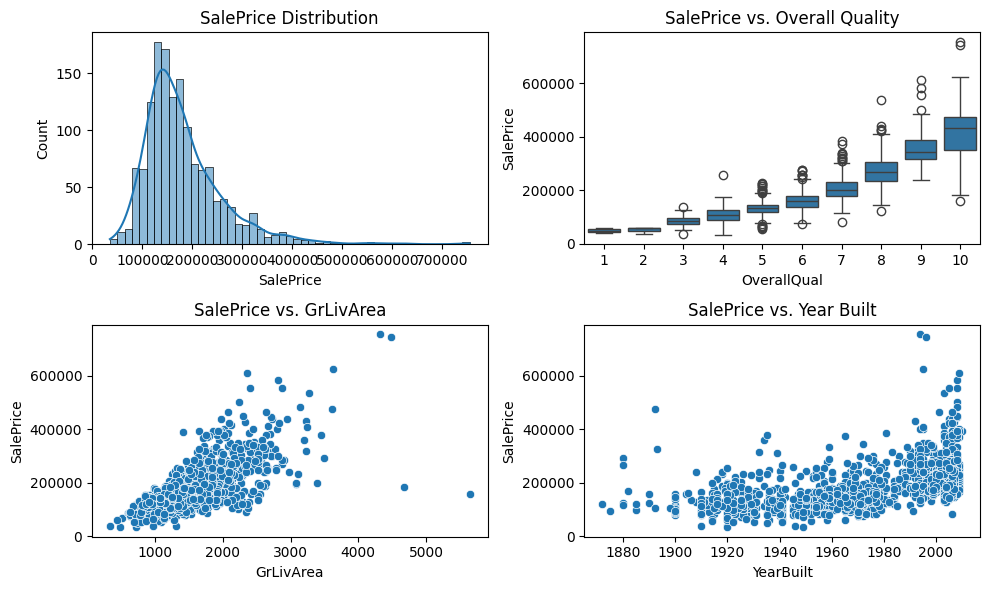

In [8]:
# Setting up the matplotlib figure
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 6))

# SalePrice Distribution
sns.histplot(train_data["SalePrice"], kde=True, ax=axs[0, 0])
axs[0, 0].set_title("SalePrice Distribution")

# Overall Quality vs. SalePrice
sns.boxplot(x="OverallQual", y="SalePrice", data=train_data, ax=axs[0, 1])
axs[0, 1].set_title("SalePrice vs. Overall Quality")

# Above Grade (Ground) Living Area Square Feet vs. SalePrice
sns.scatterplot(x="GrLivArea", y="SalePrice", data=train_data, ax=axs[1, 0])
axs[1, 0].set_title("SalePrice vs. GrLivArea")

# Year Built vs. SalePrice
sns.scatterplot(x="YearBuilt", y="SalePrice", data=train_data, ax=axs[1, 1])
axs[1, 1].set_title("SalePrice vs. Year Built")

plt.tight_layout()
plt.show()


Based on the visulaizations above where we explore individual variables we observe that:
* SalePrice Distribution: The distribution of "SalePrice" is right skewed, suggesting that most houses are in the lower price range, with few houses going in the higher range.

* SalePrice vs Overall Quality: A positive relationship exists between "OveallQual" and "SalePrice" suggesting higher quality houses tends to sell for higher price. There is a strong linear relationship making "OverallQual" a good predictor for "SalePrice".

* SalePrice vs GrLivArea: There is a positive correlation between "GrLivArea" and "SalePrice" suggesting that as the living area increases the sale price tends to increase as well. However, few outliers are present observed from the scatter plot as some house with large living areas have relatively low prices.

* SalePrice vs YearBuilt: There is a slight trend where newer houses tend to sell at higher price, but the relationship is not as stong as with "OverallQual" or "GrLivArea". Some older houses also has higher sale price, possibly due to historical value or other desirable features.

# Analysis

## Stratified Sampling

To begin the analysis section, we wanted to compare the use of a stratified sampling procedure to a simple random sample (SRS), to estimate the mean sales price. We stratified the housing data based on the variable 'BldgType', which represents the type of house, such as single family, townhouse, etc. This stratification variable was chosen in an attempt to decrease the relative ratio of variance within- to between-strata. As there is logically a difference in value between the various housing types, we hypothesized that this would translate in to a greater variance between strata and imporve the estimates from the stratified samples.
We created random samples composed of 20% of the original population. For the stratified sample, we sampled each strata in proportion to its occurence within the population.

In [9]:
strat_pop = train_data[['SalePrice', 'BldgType']].groupby("BldgType").agg(["count", "mean", "var"]).SalePrice

simple_sample = train_data['SalePrice'].sample(frac=0.2, random_state=100)
strat_sample = train_data[['SalePrice', 'BldgType']].groupby("BldgType").sample(frac=0.2, random_state=100)
strat_sample = strat_sample.groupby("BldgType").agg(["count", "mean", "var"]).SalePrice


Text(0.5, 1.0, 'Distribution of total variance by home type')

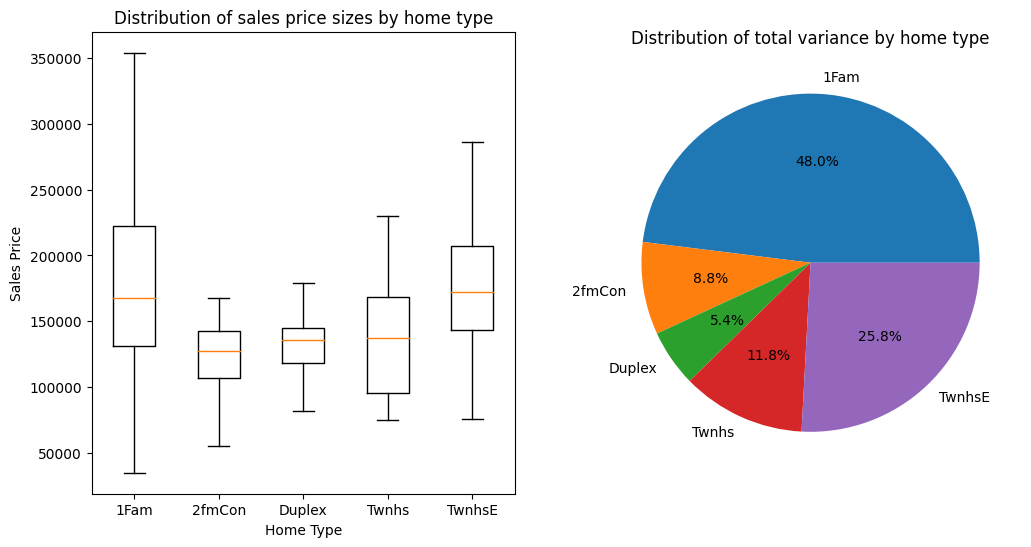

In [10]:
strat = [train_data.SalePrice[train_data.BldgType == type] for type, _ in strat_pop.iterrows()]

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
ax1.boxplot(strat, showfliers=False)
ax1.set_ylabel("Sales Price")
ax1.set_xlabel("Home Type")
ax1.set_xticklabels(strat_pop.index)
ax1.set_title("Distribution of sales price sizes by home type")

ax2.pie(strat_pop["var"], labels = strat_pop.index, autopct='%1.1f%%')
ax2.set_title("Distribution of total variance by home type")

In [11]:
import numpy as np
#Stratified Sample
#Estimate mean
N = strat_pop['count'].sum()
Nh = strat_pop['count']
nh = strat_sample['count']
strat_mean = strat_sample['mean']
strat_var = strat_sample['var']
noreplace_adj = 1-(nh/Nh)
strat_popmean_est = (Nh/N * strat_mean).sum()

#Calculate standard error
strat_varmean = ((strat_var/nh) * (Nh/N)**2 * noreplace_adj).sum()
strat_se = np.sqrt(strat_varmean)

#95% Confidence Intervals
lower_strat_ci = strat_popmean_est - 1.96 * strat_se
upper_strat_ci = strat_popmean_est + 1.96 * strat_se

true_mean = train_data['SalePrice'].mean()

print(f"The 95% confidence intervals for the stratified sample estimate of the population mean range from {lower_strat_ci:.2f} to {upper_strat_ci:.2f}.")
print(f"The true mean sale price value was {true_mean:.2f}.")

The 95% confidence intervals for the stratified sample estimate of the population mean range from 178267.32 to 195193.81.
The true mean sale price value was 180921.20.


In [12]:
#Simple random sample
#Estimate mean and calculate standard error
simple_popmean_est = simple_sample.mean()
simple_se = simple_sample.std()/np.sqrt(len(simple_sample))

#95% Confidence Intervals
lower_simple_ci = simple_popmean_est - 1.96 * simple_se
upper_simple_ci =simple_popmean_est + 1.96 * simple_se

print(f"The 95% confidence intervals for the SRS estimate of the population mean range from {lower_simple_ci:.2f} to {upper_simple_ci:.2f}.")
print(f"The true mean sale price value was {true_mean:.2f}.")

The 95% confidence intervals for the SRS estimate of the population mean range from 172904.46 to 191329.75.
The true mean sale price value was 180921.20.


In [13]:
ci_ratio = (upper_strat_ci - lower_strat_ci)/(upper_simple_ci - lower_simple_ci)

print(f"The 95% confidence intervals for stratified sample CIs are {ci_ratio * 100:.2f}% as wide as those of the SRS.")

The 95% confidence intervals for stratified sample CIs are 91.87% as wide as those of the SRS.


After stratifying the data, we found that just under half of the total Sale Price variation could be attributed to single family homes. We additionally found that both sampling procedures were accurate, in that both of the confidence intervals captured the true mean sale price. However, the stratified sampling method produced confidence intervals that were roughly 10% smaller, indicating an increase in the precision of the estimate. The change in precision is highly dependent upon the variables upon which stratification occurs, and could potentially be further improved by including more/better stratification variables.

## Linear Regression


We then set out to model the Sale Price as a linear function of a set of the available predictor variables. As the sci-kit learn module necessitates the use of binary operators to represent categorical variables, the first step was to create dummy variables. A binary dummy variable was created for each level of all of the categorical variables. This resulted in a total of 304 predictor variables. Following the creation of dummy variables, we additionally split the dataset 4 to 1 into training and testing sets, respectively.
We then created an inital linear model containing all of the avaailable variables. This 'full' model was to act as a benchmark to which later forms of the linear model could be compared. We calculated a Root Mean Squared Error (RMSE) value for the linear model. We chose to use RMSE, as it provides insight into both the accuracy and precision of a model.

In [14]:
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.feature_selection import f_regression
from sklearn.model_selection import cross_val_score

In [15]:
#Add dummy variables (sklearn requires new boolean col for each level of a factor)
train_data_dum = (pd.get_dummies(train_data))

#Create training and testing datasets
x = train_data_dum.loc[:, train_data_dum.columns != 'SalePrice']
y = train_data_dum['SalePrice']

x_tr, x_val, y_tr, y_val = train_test_split(x, y, test_size=0.2, random_state=100)

In [16]:
#Inital linear model with all variables
model = LinearRegression()
mse_val = np.mean(cross_val_score(model, x_tr, y_tr, cv=5, scoring='neg_mean_squared_error'))
print(f"""The RMSE value of the full linear model: ${np.sqrt(abs((mse_val))):.2f}""")

The RMSE value of the full linear model: $38281.80


### Feature Selection

The benchmark RMSE from the full linear model was found to be $38,281.90. The next step was to determine the best set of predictors from the 304 variables contained in the dataset. In addition to minimizing the RMSE, we also wanted to substantially reduce the number of variables in the linear model. With these objectives in mind, we sequentially dropped the 15 least significant variables (determined by univariate f tests) and calculated a five-fold cross-validated RMSE value for each iterative step. The RMSE values were then plotted relative to the number of features in the model to visualize the optimal model size.

In [17]:
start_n = 300
step = 15
pvals = f_regression(x_tr,y_tr)[1]

n_features = []
rmse = []
name_features = []

#Loop to iteratively drop the 15 variables with the highest univariate p-values
#At each iteration, a RMSE score is calculated through a cross-validated fitting of a linear model to the remianing variables
for i in range(start_n//step):
  n_col = start_n - i*step
  drop_top_mask = np.argpartition(pvals, n_col)[:n_col]
  x_tr_i = x_tr.iloc[:,drop_top_mask]
  model = LinearRegression()
  mse_val = np.mean(cross_val_score(model, x_tr_i, y_tr, cv=5, scoring='neg_mean_squared_error'))

  rmse.append(np.sqrt(abs((mse_val))))
  n_features.append(n_col)
  name_features.append(x_tr_i.columns)


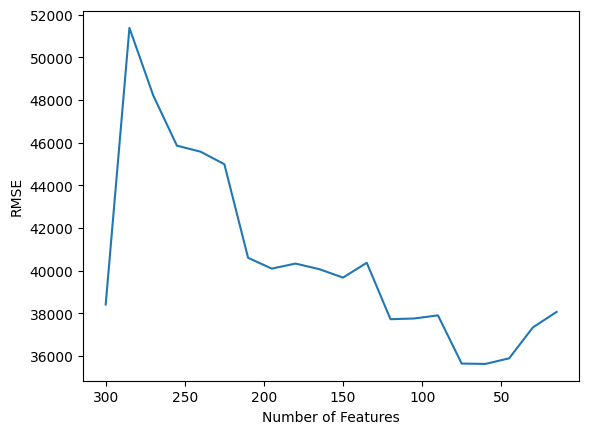

In [18]:
plt.plot(n_features, rmse)
plt.gca().invert_xaxis()
plt.xlabel("Number of Features")
plt.ylabel("RMSE");

In terms of RMSE, the linear model appears to improve when the feature space is defined by predictor variables with the 80th to 25th lowest overall univariate p-values. For further resolution within this feature space, we repeated the feature selection analysis within this range. However, we dropped only one variable during each iteration.

In [19]:
start_n = 85
step = 1
pvals = f_regression(x_tr,y_tr)[1]

n_features = []
rmse = []
name_features = []

#Loop to iteratively drop the single variables with the highest univariate p-values
#At each iteration, a RMSE score is calculated through a cross-validated fitting of a linear model to the remianing variables
for i in range(start_n//step-20):
  n_col = start_n - i*step
  drop_top_mask = np.argpartition(pvals, n_col)[:n_col]
  x_tr_i = x_tr.iloc[:,drop_top_mask]
  model = LinearRegression()
  mse_val = np.mean(cross_val_score(model, x_tr_i, y_tr, cv=5, scoring='neg_mean_squared_error'))

  rmse.append(np.sqrt(abs((mse_val))))
  n_features.append(n_col)
  name_features.append(x_tr_i.columns)

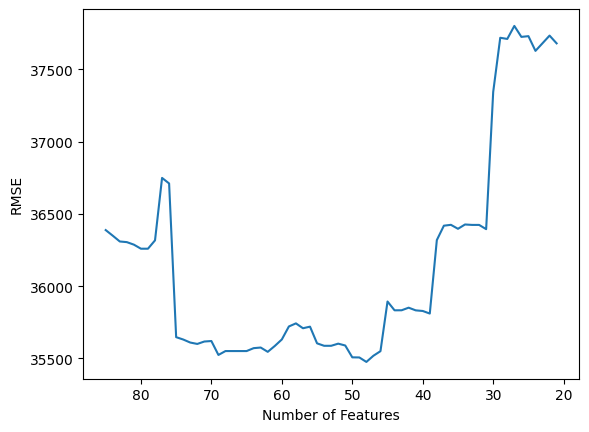

In [20]:
plt.plot(n_features, rmse)
plt.gca().invert_xaxis()
plt.xlabel("Number of Features")
plt.ylabel("RMSE");

In [21]:
min_index = np.argmin(rmse)
n_features[min_index]

48

In [22]:
#New set of x variables consisting of the 48 lowest univariate p-values
feature_mask = name_features[min_index]
x_tr_linear = x_tr[feature_mask]

We found that the cross-validated RMSE was minimzed when the linear regression model conssited of predictors that had the 48 lowest univariate p-values. We used only this sett of variables for the further processing steps.

### Higher Order Relationships
Following the above feature selection, we then wanted to look for any higher order relationships. To do this, we isolated all the numeric variables within the selected feature space. For each numeric variable, we fit a linear model with that variable represented as a quadratic term alongside all the other 48 predictor variables. Again, the model was assessed with a RMSE from a five-fold cross-validation procedure. We then plotted each of the models (defined by the feature that was squared) relative to the associated cross-validated RMSE score.

In [23]:
#Assess each numeric variable at the quadratic level
x_num_col = numerical_columns_train[0:-1]
numeric_feature_mask = np.isin(x_num_col, feature_mask)
x_num_col = x_num_col[numeric_feature_mask]

rmse_vals = []
x_var_squared = []

#iteratively build model with squared numeric variables
for col in x_num_col:
  #fit model
  x_tr_var2 = (x_tr_linear[col]**2)
  x_tr_var2.name = x_tr_linear[col].name + "2"
  x_tr2 = x_tr_linear.join(x_tr_var2)

  model = LinearRegression()
  mse_val = np.mean(cross_val_score(model, x_tr2, y_tr, cv=5, scoring='neg_mean_squared_error'))
  rmse_vals.append(np.sqrt(abs(mse_val)))
  x_var_squared.append(col)

quadratic_df = pd.DataFrame({"variable":x_var_squared,"rmse":rmse_vals})

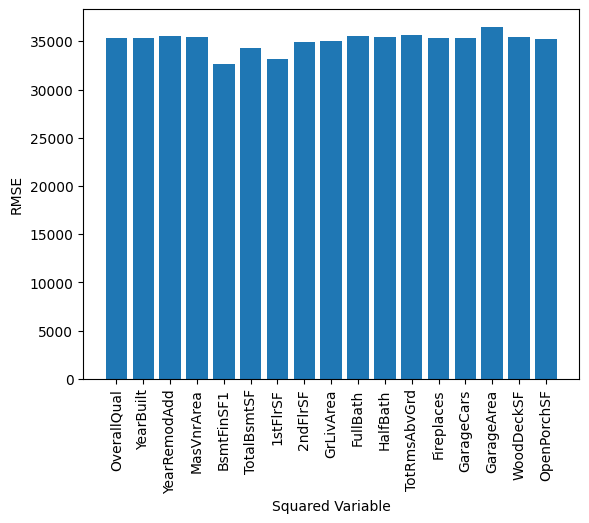

In [24]:
plt.bar(quadratic_df['variable'], quadratic_df['rmse'])
plt.xticks(rotation=90)
plt.xlabel("Squared Variable")
plt.ylabel("RMSE");

We found that the inclusion of a quadratic representation of 'BsmtFinSF1' and '1stFlrSF' results in a slight decrease of the RMSE. However, we decided that the small reduction in the RMSE did not justify the added complexity brought on by higher order terms. For this reason, we decided to use the 48 feature model without any higher order terms as the final linear model.

### Model Assumptions


Following the selection of features for our final model, we set out to assess the model's validity. Specifically, we wanted to examine the homoscedasticity, linearity, normality, and independecne assumptions. We started out by plotting the residuals of the predicted Sales Price relative to the actual Sales Price.

In [25]:
model = LinearRegression()
model.fit(x_tr_linear, y_tr)
predictions = model.predict(x_tr_linear)
residuals = abs(y_tr) - abs(predictions)
df_resid = pd.DataFrame({'predictions': predictions, 'actual': y_tr, 'residuals': residuals})

df_resid.sort_values(by = 'actual',inplace = True)
#line_coords = np.arange(df_results.min().min(), df_results.max().max())

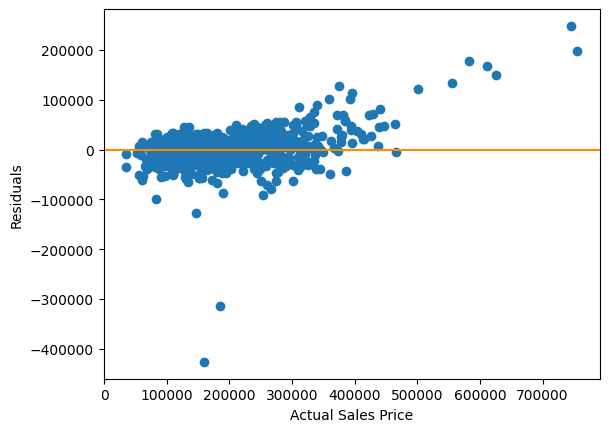

In [26]:
plt.scatter(df_resid['actual'], df_resid['residuals'])
plt.xlabel("Actual Sales Price")
plt.ylabel("Residuals")
plt.axhline(0, color='darkorange')

When the actual Sale Price is low, the residuals show a general clustering around the actual Sales Price without any clear pattern (roughly homoscedastic). However, there is a clear pattern wherein the magnitude of the residuals increases in the positive direction for higher actual Sales Prices. Based on this, it does not appear that the linear model meets the homoscedasticity assumption. To further quantify these results, we conducted a Breusch-Pagan test.

In [27]:
import statsmodels.formula.api as smf
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
import statsmodels.api as sm

x_ols = sm.add_constant(x_tr_linear)
model = sm.OLS(y_tr,x_ols)
results = model.fit()
bp_test = sms.het_breuschpagan(results.resid, results.model.exog)

names = ['Lagrange multiplier statistic',
         'p-value',
         'f-value',
         'f p-value']

lzip(names, bp_test)

#The bp test indicates that model fails the homoscedasticity assumption

[('Lagrange multiplier statistic', 529.6009866189323),
 ('p-value', 2.2518373121511323e-82),
 ('f-value', 19.768637741510705),
 ('f p-value', 4.827658011342691e-115)]

This low p-value of the Bresch-Pagan test confirmed our suspicion that the  linear model does not meet the assumption of homoscedasticity. Additionally, it appears unlikely that the model would meet the multicollinearity and normality requirements. Many of the predictor variables also can not be said to be independent (e.g. lot frontage and lot area). Nevertheless, we decided to proceed to the model testing stage in order to obtain an approximation of the predictive capabilities of a linear model in this context.


### Model Testing
To test the accuracy and precision of the final model, we fit the selected model with all available training data nad assessed it against the withheld testing data. We calculated corresponding RMSE and R^2 values.

In [28]:
col_mask = x_tr_linear.columns
x_val_linear = x_val[col_mask]

model = LinearRegression()
model.fit(x_tr_linear, y_tr)
y_hat = model.predict(x_val_linear)

rmse_val = np.sqrt(mean_squared_error(y_val, y_hat))
r2 = model.score(x_tr_linear, y_tr)

print(f"""RMSE: {rmse_val:.2f}""")
print(f"""R^2: {r2:.2f}""")

RMSE: 31539.07
R^2: 0.84


We found that the resulting RMSE value of $31,539.07 was about 20% lower than that of the full model. This indicates that our selection of variables appears to have increased both the precision and accuracy of the model. However, the lack of validity indicates that the results in this study should not be generalized.

In [29]:
#Finally saving RMSE and R2 values to Datframe for final model selection (between Linear,Decision and Random Forest Regression)
df_compare = pd.DataFrame()
# Add results to the DataFrame
new_row = {"Model": "Linear Regression", "RMSE": rmse_val, "R2": r2}

new_row_df = pd.DataFrame([new_row])  # Convert new_row to a DataFrame

# Use concat to add the new row
df_compare = pd.concat([df_compare, new_row_df], ignore_index=True)

## Decision Tree Regression

The decision tree is a simple machine learning model for getting started with regression tasks.

Background A decision tree is a flow-chart-like structure, where each internal (non-leaf) node denotes a test on an attribute, each branch represents the outcome of a test, and each leaf (or terminal) node holds a class label.
The application of decision tree regression, is explored in the context of predicting house sale prices.
Initially, a decision tree model is constructed utilizing the entirety of the training dataset's features. Subsequently, feature selection based on correlation analysis is employed to identify features strongly associated with house prices. A refined decision tree model is then created using only the most correlated features. Furthermore, a more focused approach is taken, where only the two most correlated variables are utilized to construct yet another decision tree model.

Performance evaluation of each model is conducted using rigorous metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and adjusted R-squared. The model exhibiting superior performance across these metrics is selected as the Final model for analysis like cross validation, hyper parameter tuning, feature importance analysis and prediction in this section.

Firstly, We convert all the non numeric data in train_data to numeric data for training using Labelencoder

In [30]:
# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Iterate through each column in train_data
for col in train_data.columns:
    # Check if the column dtype is object (non-numeric)
    if train_data[col].dtype == 'object':
        # Fit label encoder and transform values for the column
        train_data[col] = label_encoder.fit_transform(train_data[col])

# Display the modified train_data
display(train_data.head())


Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
0   1          60         3         65.0     8450       1      1         3   
1   2          20         3         80.0     9600       1      1         3   
2   3          60         3         68.0    11250       1      1         0   
3   4          70         3         60.0     9550       1      1         0   
4   5          60         3         84.0    14260       1      1         0   

   LandContour  Utilities  ...  PoolArea  PoolQC  Fence  MiscFeature  MiscVal  \
0            3          0  ...         0       3      4            1        0   
1            3          0  ...         0       3      4            1        0   
2            3          0  ...         0       3      4            1        0   
3            3          0  ...         0       3      4            1        0   
4            3          0  ...         0       3      4            1        0   

   MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0       2    2008         8              4     208500  
1       5    2007         8              4     181500  
2       9    2008         8              4     223500  
3       2    2006         8              0     140000  
4      12    2008         8              4     250000  

[5 rows x 81 columns]

Lets Plot a correlation heatmap to see where correlation exist for the train_data

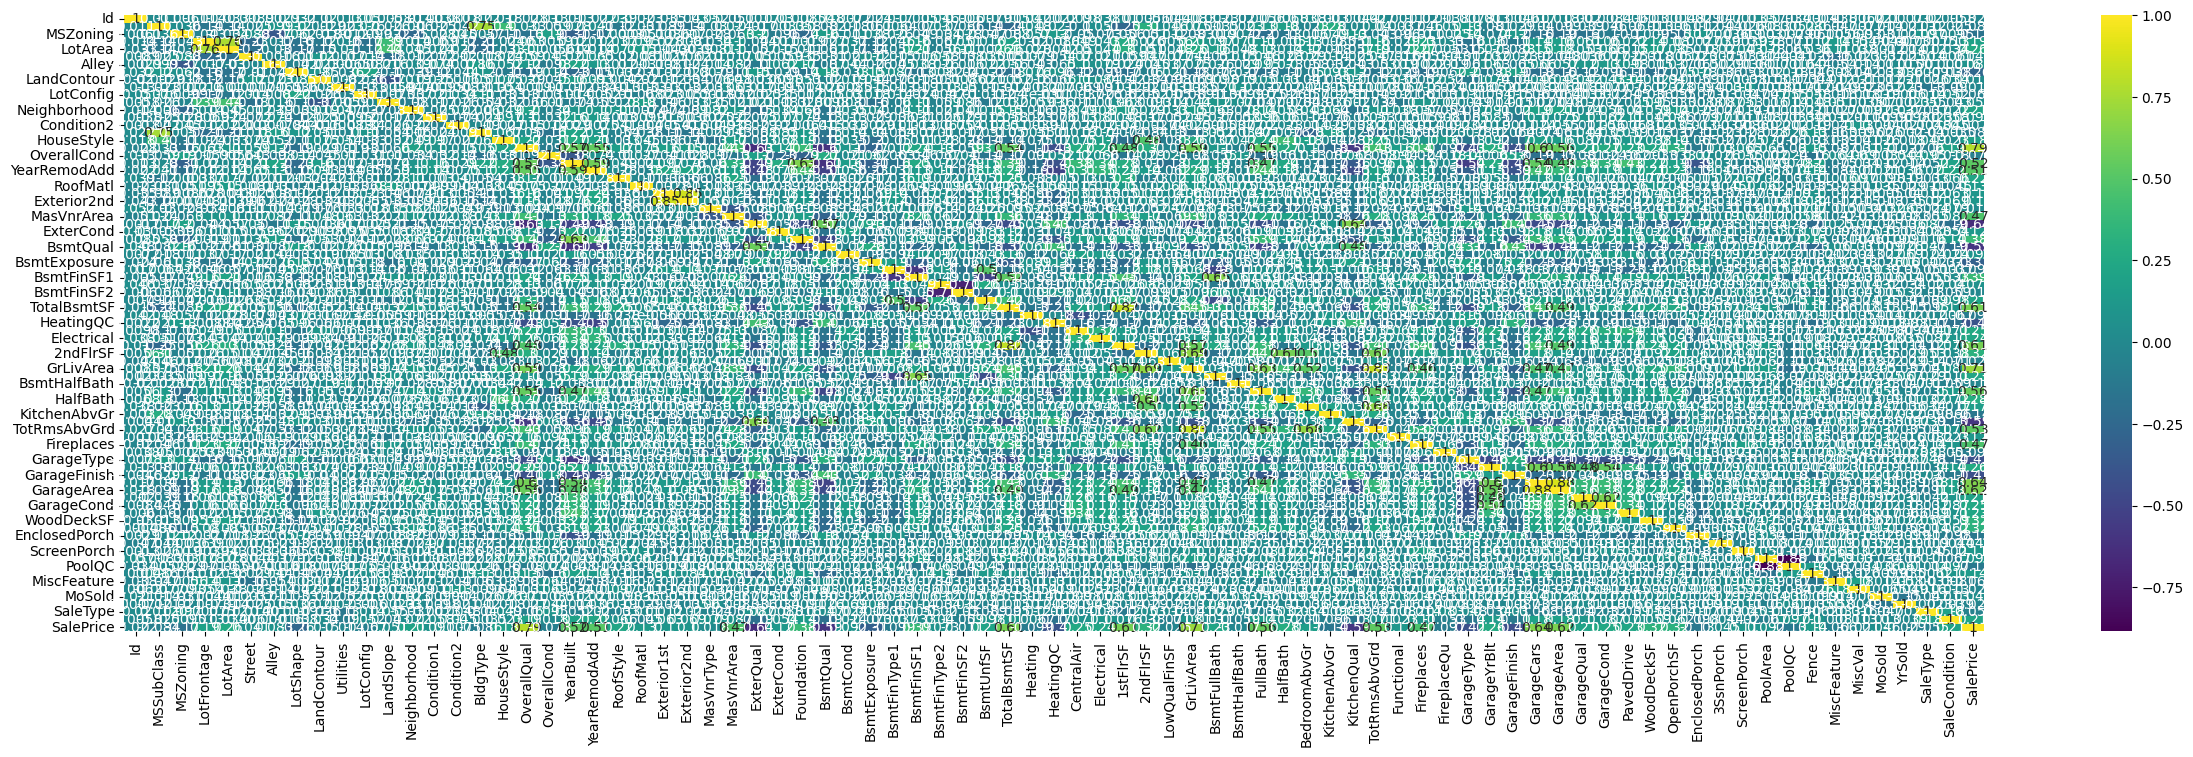

In [31]:
plt.figure(figsize=(30,8))
sns.heatmap(train_data.corr(), cmap='viridis', annot=True)
plt.show()

# Applying Decision tree Regressor On the train_data

---



# *MODEL 1*

In [32]:
train_data1=train_data
X_train, X_test, y_train, y_test = train_test_split(train_data.drop('SalePrice', axis=1), train_data['SalePrice'], test_size=0.2, random_state=100)

# Scaling the data
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train.values.reshape(-1,1))
y_test = sc_y.transform(y_test.values.reshape(-1,1))

# Creating and Training the model
dtreg1 = DecisionTreeRegressor(random_state=100)
dtreg1.fit(X_train, y_train)

dtr_pred1 = dtreg1.predict(X_test)
dtr_pred1 = dtr_pred1.reshape(-1,1)

print("Mean Absolute error is:", metrics.mean_absolute_error(y_test, dtr_pred1))
print("Mean Squared Error is:", metrics.mean_squared_error(y_test, dtr_pred1))
print("The RMSE values is:", np.sqrt(metrics.mean_squared_error(y_test, dtr_pred1)))
print("R-squared (R^2) score:", r2_score(y_test, dtr_pred1))

Mean Absolute error is: 0.3360629192743319
Mean Squared Error is: 0.22548313589524124
The RMSE values is: 0.47485064588272513
R-squared (R^2) score: 0.7798942903174635


**Visualizing the data**

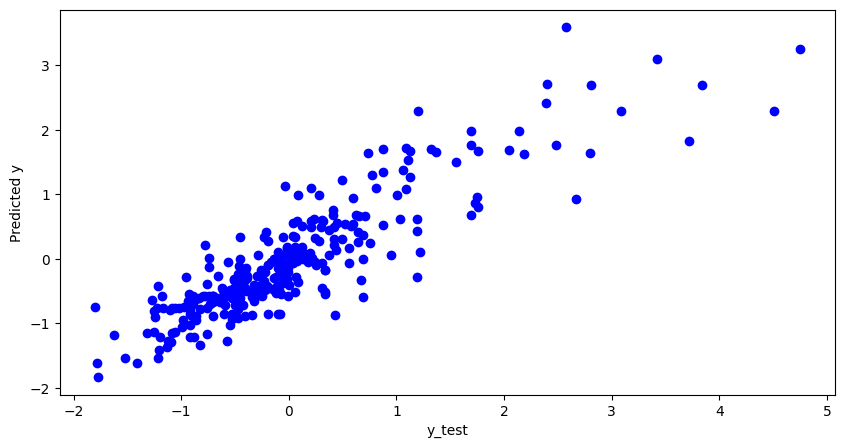

In [33]:
plt.figure(figsize=(10,5))
plt.scatter(y_test, dtr_pred1,c="BLUE")
plt.xlabel("y_test")
plt.ylabel("Predicted y")
plt.show()



---



**Now Lets find the features with > 0.5 correlation**

In [34]:
corr=train_data.corr()
corr[corr['SalePrice']>0.5].index

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea',
       'SalePrice'],
      dtype='object')

**Dropping columns less than 0.5 correlation with SalePrice**

In [35]:
train_data2=train_data[['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF','GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'SalePrice']]

**Plot a correlation heatmap to see correlation of selected features of train_data**

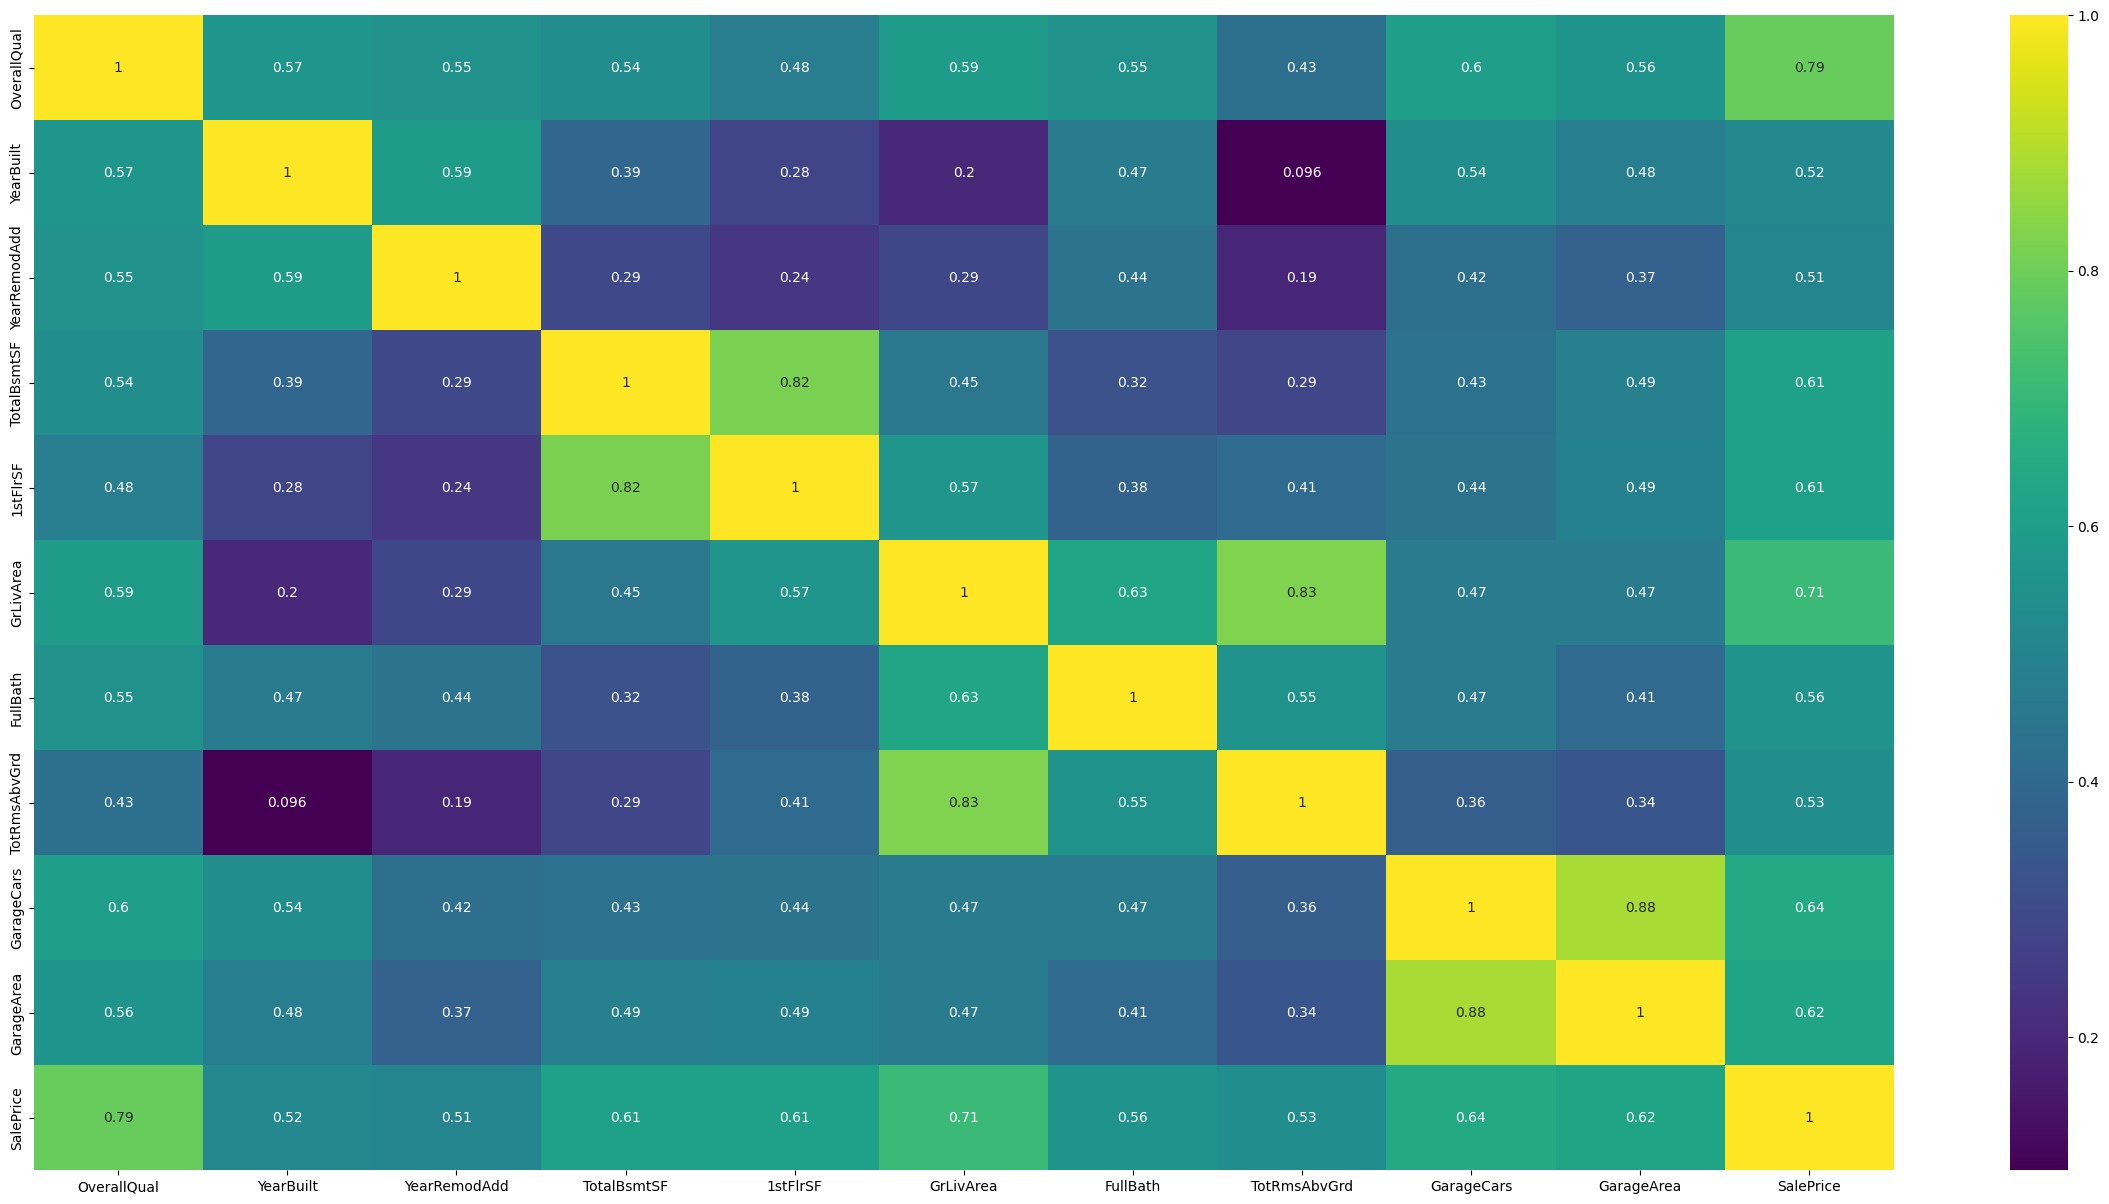

In [36]:
plt.figure(figsize=(30,15))
sns.heatmap(train_data2.corr(), cmap='viridis', annot=True)
plt.show()

# *MODEL 2*

# Applying Decision tree Regressor on 11 features with > 0.5 correlation score

---



In [37]:
# Splitting the data
X1_train, X1_test, y1_train, y1_test = train_test_split(train_data2.drop('SalePrice', axis=1),
                                                        train_data2['SalePrice'], test_size=0.2, random_state=100)

# Scaling the data
sc_X1 = StandardScaler()
X1_train = sc_X1.fit_transform(X1_train)
X1_test = sc_X1.transform(X1_test)

sc_y1 = StandardScaler()
y1_train = sc_y1.fit_transform(y1_train.values.reshape(-1, 1))
y1_test = sc_y1.transform(y1_test.values.reshape(-1, 1))

# Creating and training the model
dtreg2 = DecisionTreeRegressor(random_state=100)
dtreg2.fit(X1_train, y1_train)

# Making predictions
dtr_pred2 = dtreg2.predict(X1_test)

# Calculating evaluation metrics
print("Mean Absolute error is:", metrics.mean_absolute_error(y1_test, dtr_pred2))
print("Mean Squared Error is:", metrics.mean_squared_error(y1_test, dtr_pred2))
print("The RMSE values is:", np.sqrt(metrics.mean_squared_error(y1_test, dtr_pred2)))
print("R-squared (R^2) score:", r2_score(y1_test, dtr_pred2))

Mean Absolute error is: 0.3263208267063119
Mean Squared Error is: 0.22930347299033207
The RMSE values is: 0.47885642210409174
R-squared (R^2) score: 0.7761650623900491




---



In the model utilizing 11 features, we note minimal disparity in evaluation metrics compared to the model encompassing all features. Consequently, this model appears viable for subsequent processing. However, prior to proceeding further, we will assess the model employing the top two features as well.

**As per the Correlation matrix above we observe that OverallQual and GrLivArea had the best correlation with saleprice with over 0.70 correlation score**

# *MODEL 3*

# Applying Decision tree Regressor with 2 best features OverallQual and GrLivArea

---



In [38]:
# Selecting only the features "OverallQual" and "GrLivArea"
X2_train = train_data[['OverallQual', 'GrLivArea']]
y2_train = train_data['SalePrice']

# Splitting the dataset into training and testing sets
X2_train, X2_test, y2_train, y2_test = train_test_split(X2_train, y2_train, test_size=0.2, random_state=100)

# Scaling the data
sc_X2 = StandardScaler()
X2_train = sc_X2.fit_transform(X2_train)
X2_test = sc_X2.transform(X2_test)

sc_y2 = StandardScaler()
y2_train = sc_y2.fit_transform(y2_train.values.reshape(-1,1))
y2_test = sc_y2.transform(y2_test.values.reshape(-1,1))


### Creating and Training the model
dtreg3 = DecisionTreeRegressor (random_state=100)
dtreg3.fit(X2_train, y2_train)

dtr_pred3 = dtreg3.predict(X2_test)
dtr_pred3 = dtr_pred3.reshape(-1,1)

print("Mean Absolute error is:", metrics.mean_absolute_error(y2_test, dtr_pred3))
print("Mean Squared Error is:", metrics.mean_squared_error(y2_test, dtr_pred3))
print("The RMSE values is:", np.sqrt(metrics.mean_squared_error(y2_test, dtr_pred3)))
print("R-squared (R^2) score:", r2_score(y2_test, dtr_pred3))

Mean Absolute error is: 0.3783626448818505
Mean Squared Error is: 0.29381763841752634
The RMSE values is: 0.5420494796764649
R-squared (R^2) score: 0.7131894606469263


These results suggest that both models perform reasonably well in predicting the sale price. However, the model trained with 11 features exhibits a slight superiority over the model trained with only 2 features. This is evidenced by lower values for MAE, MSE, and RMSE, coupled with a higher r2adj value, indicating enhanced performance.

# Thus we select the Decision tree model with 11 features (Model 2) as our final model for further processing

---



# STEP 1 : MODEL DEVELOPMENT

In [39]:
# Splitting the data
X1_train, X1_test, y1_train, y1_test = train_test_split(train_data2.drop('SalePrice', axis=1),
                                                        train_data2['SalePrice'], test_size=0.2, random_state=100)

# Scaling the data
sc_X1 = StandardScaler()
X1_train = sc_X1.fit_transform(X1_train)
X1_test = sc_X1.transform(X1_test)

sc_y1 = StandardScaler()
y1_train = sc_y1.fit_transform(y1_train.values.reshape(-1, 1))
y1_test = sc_y1.transform(y1_test.values.reshape(-1, 1))

# Creating and training the model
dtreg2 = DecisionTreeRegressor(random_state=100)
dtreg2.fit(X1_train, y1_train)

# Making predictions
dtr_pred2 = dtreg2.predict(X1_test)

# Calculating evaluation metrics
print("Mean Absolute error is:", metrics.mean_absolute_error(y1_test, dtr_pred2))
print("Mean Squared Error is:", metrics.mean_squared_error(y1_test, dtr_pred2))
print("The RMSE values is:", np.sqrt(metrics.mean_squared_error(y1_test, dtr_pred2)))
print("R-squared (R^2) score:", r2_score(y1_test, dtr_pred2))

Mean Absolute error is: 0.3263208267063119
Mean Squared Error is: 0.22930347299033207
The RMSE values is: 0.47885642210409174
R-squared (R^2) score: 0.7761650623900491


Interpretation of output:
*   The MAE is approximately 0.3263, indicating, on average, the model's predictions are off by around 0.3263 standard deviations from the actual sale prices
*   A lower MSE suggests better accuracy. Here, the MSE is approximately 0.2293
*   The RMSE value of approximately 0.4789 indicates the model's predictions are typically off by about 0.4789 standard deviations
*   An R-squared score closer to 1 indicates a better fit of the model to the data. In this case, the R-squared score is approximately 0.7762, indicating that the model explains roughly 77.62% of the variance in the sale prices





# STEP 2: CROSS VALIDATION

**Applying K-fold cross validation on the Final Model**

In [40]:
# Define the number of folds
k_folds = 5

# Initialize KFold
kf = KFold(n_splits=k_folds, shuffle=True, random_state=100)

# Initialize empty lists to store evaluation metrics for each fold
mae_scores = []
rmse_scores = []
r2_scores = []
mse_scores = []  # Added to store MSE for each fold

# Perform k-fold cross-validation
for train_index, val_index in kf.split(X1_train):
    X_train_fold, X_val_fold = X1_train[train_index], X1_train[val_index]
    y_train_fold, y_val_fold = y1_train[train_index], y1_train[val_index]

    # Fit the model
    dtreg_fold = DecisionTreeRegressor(random_state=100)
    dtreg_fold.fit(X_train_fold, y_train_fold)

    # Predict on the validation set
    y_pred_fold = dtreg_fold.predict(X_val_fold)

    # Calculate evaluation metrics for this fold
    mae_fold = mean_absolute_error(y_val_fold, y_pred_fold)
    mse_fold = mean_squared_error(y_val_fold, y_pred_fold)
    rmse_fold = np.sqrt(mse_fold)
    r2_fold = r2_score(y_val_fold, y_pred_fold)

    # Append scores to lists
    mae_scores.append(mae_fold)
    mse_scores.append(mse_fold)  # Added
    rmse_scores.append(rmse_fold)
    r2_scores.append(r2_fold)

# Calculate the average scores across all folds
avg_mae = np.mean(mae_scores)
avg_mse = np.mean(mse_scores)  # Corrected variable name
avg_rmse = np.mean(rmse_scores)
avg_r2 = np.mean(r2_scores)

# Print average scores
print("Average Mean Absolute Error across", k_folds, "folds:", avg_mae)
print("Average Mean Squared Error across", k_folds, "folds:", avg_mse)
print("Average Root Mean Squared Error across", k_folds, "folds:", avg_rmse)
print("Average R-squared score across", k_folds, "folds:", avg_r2)

Average Mean Absolute Error across 5 folds: 0.34390081988452736
Average Mean Squared Error across 5 folds: 0.2616984259716445
Average Root Mean Squared Error across 5 folds: 0.5066955753264861
Average R-squared score across 5 folds: 0.739778185216591


After performing a k-fold cross-validation to assess the performance of the decision tree regression model we have found that Overall, the average evaluation metrics from cross-validation suggest that the model's performance is consistent across different folds of the data, with slightly worse performance compared to the metrics obtained from a single train-test split. This comprehensive assessment provides a more reliable estimate of the model's generalization ability.

Applying hyperparameter tuning using GridSearchCV after k-fold cross-validation helps in selecting the best-performing model with optimized hyperparameters, leads to improved generalization and better performance on unseen data.

# STEP 3: HYPER PARAMETER TUNING

**Applying Hyper parameter tuning using GridSearchCV on the model after K-fold cross validation**

In [41]:
# Define the parameter grid
param_grid = {
    'max_depth': [3, 4, 5, 6, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=DecisionTreeRegressor(random_state=100),
                           param_grid=param_grid,
                           scoring='neg_mean_squared_error',
                           cv=k_folds)

# Fit GridSearchCV to the training data
grid_search.fit(X1_train, y1_train)

# Get the best parameters found by GridSearchCV
best_params = grid_search.best_params_

# refit the model with the best parameters on the entire training dataset
best_model = grid_search.best_estimator_
best_model.fit(X1_train, y1_train)

DecisionTreeRegressor(max_depth=6, min_samples_leaf=2, min_samples_split=10,
                      random_state=100)

So, based on the grid search, the best-performing decision tree regressor model was achieved with max_depth=6, min_samples_leaf=2, min_samples_split=10. These hyperparameters were selected to optimize the model's performance, likely resulting in better generalization and less overfitting

# STEP 4: EVALUATION METRICS OF FINAL MODEL AFTER CROSS VALIDATION AND HYPERPARAMETER TUNING

In [42]:
# Predict on the test set using the best model
y_pred_test = best_model.predict(X1_test)

# Inverse transform the scaled predictions to get the original scale
y_pred_test_original_scale = sc_y1.inverse_transform(y_pred_test.reshape(-1, 1))

# Inverse transform the y1_test to get the original scale
y1_test_original_scale = sc_y1.inverse_transform(y1_test)

# Calculate Mean Absolute Error and Mean Squared Error
mae = mean_absolute_error(y1_test_original_scale, y_pred_test_original_scale)
mse = mean_squared_error(y1_test_original_scale, y_pred_test_original_scale)

# Calculate Root Mean Squared Error
rmse = np.sqrt(mse)

# Calculate R-squared (R^2) Score
r2 = r2_score(y1_test_original_scale, y_pred_test_original_scale)

#Adding the RMSE and R2 values to the dataframe for final comparison
new_row = {"Model": "Decision Tree", "RMSE": rmse, "R2": r2}
new_row_df = pd.DataFrame([new_row])  # Convert new_row to a DataFrame

# Use concat to add the new row
df_compare = pd.concat([df_compare, new_row_df], ignore_index=True)

print("Root Mean Squared Error (Original Scale):", rmse)
print("R-squared (R^2) Score:", r2)

Root Mean Squared Error (Original Scale): 36632.419444145424
R-squared (R^2) Score: 0.7912715301210397


Interpretation of the Output:

*   The RMSE, in the original scale is approximately $36,632.42. This value represents the average magnitude of the errors between the predicted house sale prices and the actual sale prices in the original currency unit. Lower RMSE values indicate better model performance in accurately predicting house sale prices
*   is approximately 0.7913. This value indicates that the model explains approximately 79.13% of the variance in the house sale prices. A higher R-squared value suggests that the model provides a good fit to the data and effectively captures the variability in the target variable.

In summary, the model exhibits relatively low error (as indicated by the RMSE) and a high level of explained variance (as indicated by the R-squared score), suggesting that it performs well in predicting house sale prices based on the selected features.

**Visualizing actual vs. predicted values**

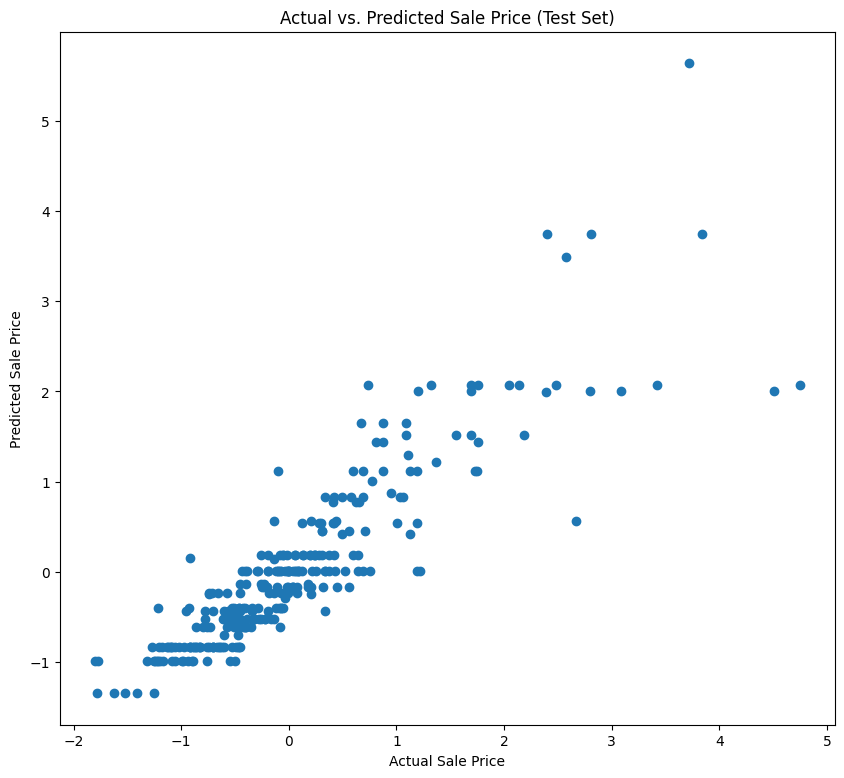

In [43]:
plt.figure(figsize=(10,9))
plt.scatter(y1_test, y_pred_test)
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Actual vs. Predicted Sale Price (Test Set)")
plt.show()

# STEP 5: FEATURE IMPORTANCE ANALYSIS

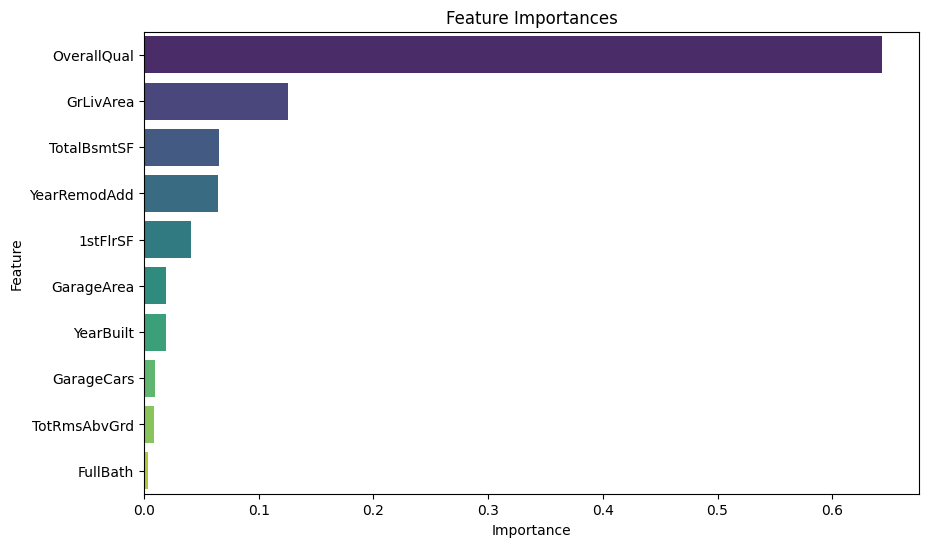

In [44]:
# Get feature importances from the trained model
feature_importances = dtreg2.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': train_data2.drop('SalePrice', axis=1).columns,
                                      'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, hue='Feature', palette='viridis', legend=False)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

The analysis of feature importance highlights that certain features, such as 'OverallQual', 'GrLivArea', 'TotalBsmtSF', 'YearRemodAdd', and '1stFlrSF', exhibit notably higher importance scores. These features, represented by taller bars in the plot, exert a stronger influence on the model's predictions of house sale prices. As a result, they are deemed more pivotal in determining the outcome of the model's predictions

# STEP 6: VISUALIZING THE FINAL MODEL AS A DECISION TREE

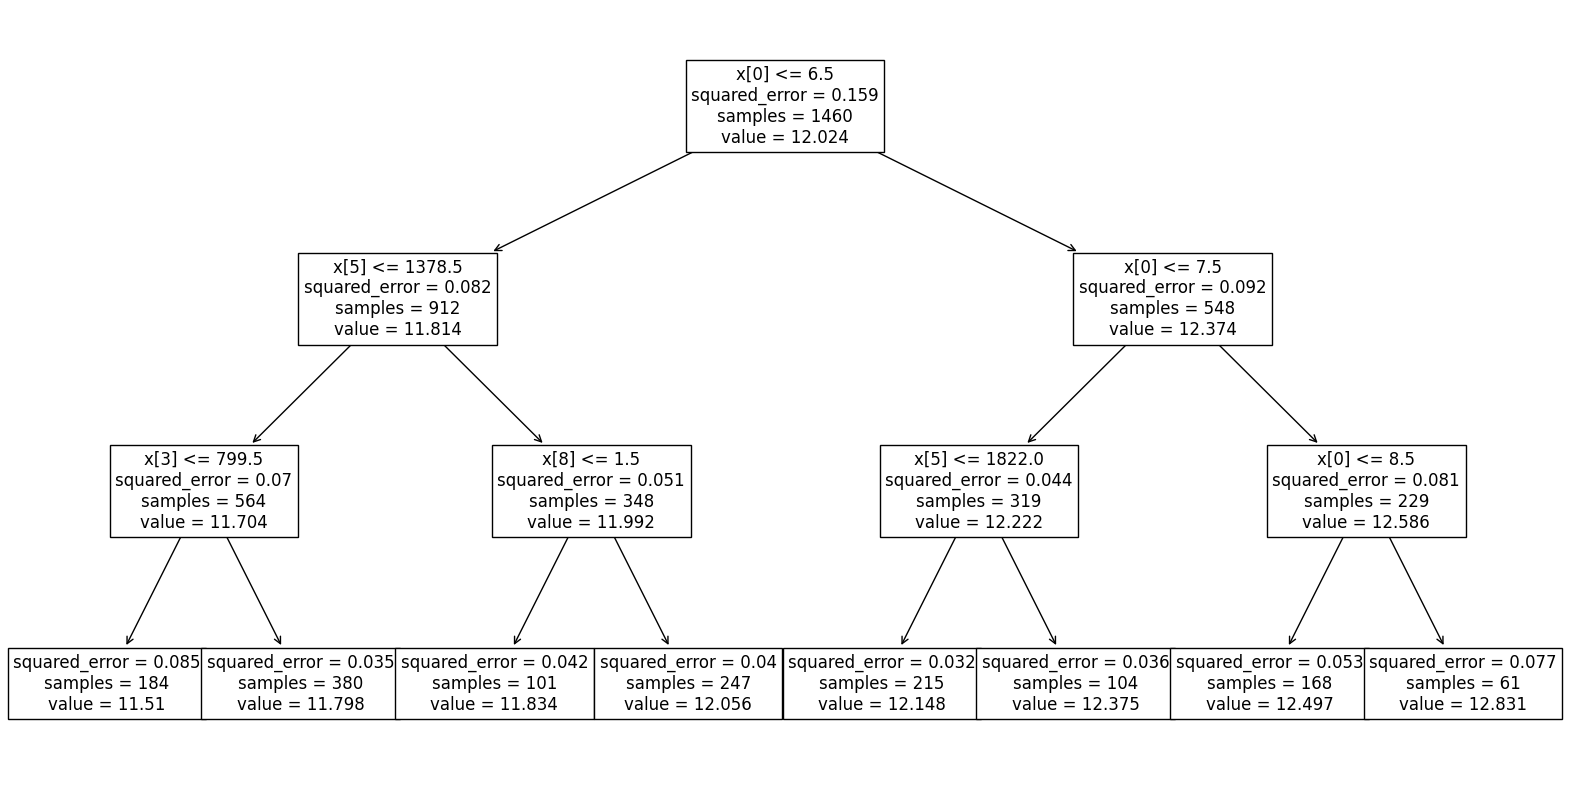

In [45]:
X = train_data[['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea',]]
y = np.log(train_data["SalePrice"])
model = DecisionTreeRegressor(max_depth=3)
model.fit(X, y)
fig = plt.figure(figsize=(20,10))
ax = plt.gca()
plot_tree(model, ax=ax, fontsize=12);
plt.show()

# STEP 7: PREDICTING THE SALE PRICE USING THE FINAL DECSION TREE MODEL

In [46]:
# Use the trained model to make predictions on the test set
predicted_sale_price_scaled = dtreg2.predict(X1_test)

# Inverse transform the scaled predicted sale prices to get the original scale
predicted_sale_price = sc_y1.inverse_transform(predicted_sale_price_scaled.reshape(-1, 1))

# Print the first few predicted sale prices
print("Predicted Sale Prices:")
for price in predicted_sale_price[:5]:  # Displaying only the first five predictions
    print(price[0])

Predicted Sale Prices:
124500.0
190000.0
167240.0
227875.0
138800.0


By examining these predicted sale prices, we gain insights into the model's performance in estimating the prices of properties based on the given features. Comparing these predictions with the actual sale prices can further assess the accuracy and effectiveness of the trained decision tree regression model.

# Summary of Analysis:

*   The analysis began with exploratory data analysis and feature selection, identifying key features strongly correlated with house sale prices
*   A Decision Tree Regression model was trained using the selected features, and its performance was evaluated using various metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared (R^2) score
*   Cross-validation was performed to assess the model's stability and generalization ability across different subsets of the data
*   Hyperparameter tuning using GridSearchCV was conducted to optimize the Decision Tree model's parameters, improving its performance on the training data
*   Finally, predictions were made on the test set, and the performance of the model was evaluated using the chosen metrics


While Decision Tree Regression offers interpretability and ease of understanding, it is susceptible to overfitting, particularly with complex datasets or deep trees, and its performance may be constrained by feature selection and hyperparameter choices, potentially resulting in suboptimal predictions. The analysis did not utilize feature engineering or advanced techniques to enhance model performance. Incorporating Random Forest Regression could address these limitations by leveraging ensemble learning to improve predictive accuracy and generalization while retaining interpretability

# Random Forest Regression

We proceeded to explore the capabilities of the Random Forest Regressor, an ensemble learning method known for its robustness and accuracy in dealing with complex datasets. Recognizing the potential of Random Forest in capturing nonlinear relationships and interactions among variables, we embarked on incorporating this model to predict the Sale Price, leveraging its capacity to handle a multitude of predictor variables, including both numerical and categorical data.

Random Forest's ensemble approach not only improves prediction accuracy and robustness over single decision trees but also offers advantages in handling complex data types and relationships compared to Linear Regression. These characteristics make Random Forest a versatile and powerful choice for many predictive modeling tasks.

The data, already prepped for linear and decision tree analyses and divided into training and testing sets, will be utilized identically in our exploration of the Random Forest model.

In [47]:
#Add dummy variables (sklearn requires new boolean col for each level of a factor)
train_data_dum = (pd.get_dummies(train_data_random_forest))
X = train_data_dum.drop([ 'SalePrice'],axis = 1)
y = train_data_dum['SalePrice']
#Split data to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)
X_train.shape


(1168, 304)

In [48]:
# Initialize an empty DataFrame for results for showing the final result comparison between different models
df_reduced_RMSE_R2 = pd.DataFrame(columns=["Model", "RMSE", "R2","OOB Score"])

# Baseline Model

In the model building phase, we initiate by training a RandomForestRegressor using its default settings. This initial step allows us to establish a baseline performance, providing a reference point for evaluating the effectiveness of the model before any parameter adjustments or optimizations are made. This foundational model serves as a starting line for further refinements and enhancements in our predictive analysis.

In [49]:
#Train a baseline RandomForestRegressor model
baseline_model = RandomForestRegressor(oob_score=True, random_state=10)
baseline_model.fit(X_train, y_train)
baseline_oob_score = baseline_model.oob_score_
print(f"Baseline OOB Score: {baseline_oob_score:.4f}")
#Predict and find the RMSE value
y_pred_baseline = baseline_model.predict(X_test)
baseline_rmse = np.sqrt(mean_squared_error(y_test, y_pred_baseline))
print(f"Baseline RMSE Score: {baseline_rmse:.4f}")

baseline_r2score = r2_score(y_test, y_pred_baseline)
print(f"Baseline R2 Score: {baseline_r2score:.4f}")
# Add results to the DataFrame
new_row = {"Model": "Baseline", "RMSE": baseline_rmse, "R2": baseline_r2score, "OOB Score":baseline_oob_score}
new_row_df = pd.DataFrame([new_row])  # Convert new_row to a DataFrame

# Use concat to add the new row
df_reduced_RMSE_R2 = pd.concat([df_reduced_RMSE_R2, new_row_df], ignore_index=True)

Baseline OOB Score: 0.8408
Baseline RMSE Score: 27948.0504
Baseline R2 Score: 0.8785


# HyperParameter Tuning

After setting up our baseline model, we move on to the vital task of hyperparameter tuning. To identify the best settings for our RandomForestRegressor, we'll utilize RandomizedSearchCV. This method allows us to efficiently search through a wide array of hyperparameter combinations, helping us pinpoint the most effective configuration without the exhaustive computational demand associated with GridSearchCV

In [50]:
# Define parameter grid for RandomizedSearchCV
param_grid = {
              'n_estimators': [100, 200],
              'max_depth': [None, 10, 20],
              'min_samples_split': [2, 5],
              'min_samples_leaf': [1, 2],
              'max_features': ['auto', 'sqrt',1.0],
              'criterion':['squared_error']
              }

# Initialize RandomizedSearchCV
search_model =  RandomizedSearchCV(
                            estimator=RandomForestRegressor(oob_score=True, random_state=42),
                            param_distributions=param_grid,
                            cv=5,
                            scoring='neg_mean_squared_error',
                            n_jobs=-1
                            )


search_model.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(oob_score=True,
                                                   random_state=42),
                   n_jobs=-1,
                   param_distributions={'criterion': ['squared_error'],
                                        'max_depth': [None, 10, 20],
                                        'max_features': ['auto', 'sqrt', 1.0],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [100, 200]},
                   scoring='neg_mean_squared_error')

# Predict values

After hyperparameter tuning, we predict the values and calculate how good the model is compared to baseline model. For comparison we use RMSE,R2 and OOB score


In [51]:
#Predict and find the RMSE value
y_pred_search = search_model.predict(X_test)
search_rmse = np.sqrt(mean_squared_error(y_test, y_pred_search))
print(f"Randomized Search HyperParameter tuning  RMSE Score: {search_rmse:.4f}")

search_r2score = r2_score(y_test, y_pred_search)
print(f"Randomized Search HyperParameter tuning  R2 Score: {search_r2score}")

search_oob_score = search_model.best_estimator_.oob_score_
print(f"Randomized OOB Score: {search_oob_score:.4f}")

# Add results to the DataFrame
new_row = {"Model": "RandomizedSearchCV", "RMSE": search_rmse, "R2": search_r2score, "OOB Score":search_oob_score}
new_row_df = pd.DataFrame([new_row])  # Convert new_row to a DataFrame

# Use concat to add the new row
df_reduced_RMSE_R2 = pd.concat([df_reduced_RMSE_R2, new_row_df], ignore_index=True)

Randomized Search HyperParameter tuning  RMSE Score: 27557.2728
Randomized Search HyperParameter tuning  R2 Score: 0.8818801317827695
Randomized OOB Score: 0.8431


# Feature Importance
Feature importance helps us identify the most impactful variables on a model's predictions, enhancing our understanding of the data and model behavior. Next, we will implement Feature Importance to streamline the model by removing less influential features, thereby refining and improving its performance.



Below code evaluates the importance of all features using the best-performing model, identified through RandomizedSearchCV algorithm. It extracts the feature importances, pairs them with their corresponding feature names from the training data, and then sorts them in descending order of importance, filtering out any features with zero importance. The resulting DataFrame, features, lists the significant features alongside their importance values, providing insight into which features most influence the model's predictions.

In [52]:
#Evaluate feature importance for all features
best_model = search_model.best_estimator_
#best_model = manual_model
feature_importances = best_model.feature_importances_

features = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)
features = features[features['Importance'] > 0]
num_features = len(features["Importance"])
features

Feature    Importance
4            OverallQual  5.720890e-01
16             GrLivArea  1.026671e-01
12           TotalBsmtSF  4.090310e-02
14              2ndFlrSF  3.659530e-02
13              1stFlrSF  2.993864e-02
..                   ...           ...
293       SaleType_ConLI  2.555284e-07
228     Electrical_FuseP  1.981752e-07
213        Heating_Floor  1.820186e-07
141  Exterior1st_ImStucc  1.599367e-07
116    HouseStyle_2.5Unf  8.578832e-08

[285 rows x 2 columns]

After eliminating features with zero importance, we're left with over 280 features. Upon examining the importance of the least significant features, it's evident that their contribution levels are minimal.

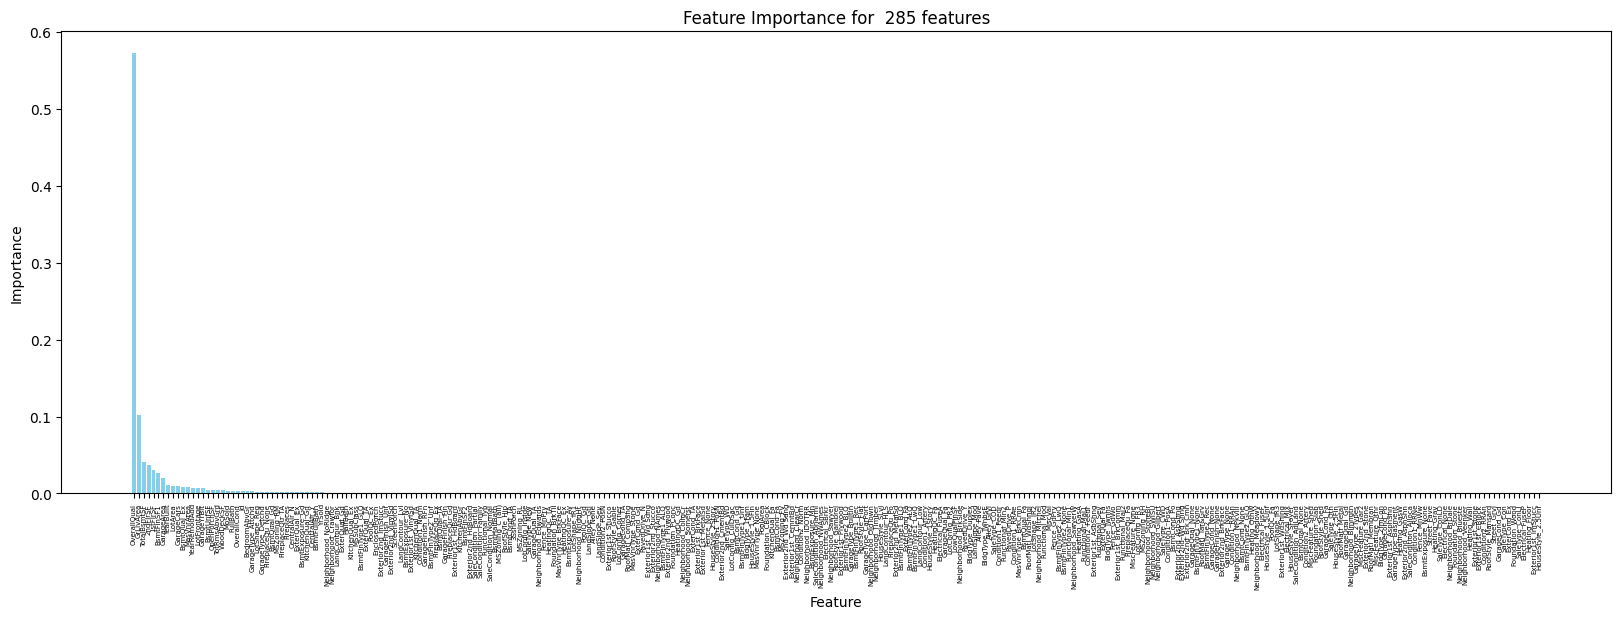

In [53]:
# Creating the bar plot to show the selected features and their importance
plt.figure(figsize=(20, 6))
plt.bar(features['Feature'], features['Importance'], color='skyblue')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title(f"Feature Importance for  {num_features} features")
plt.xticks(rotation=90,fontsize = 5)
plt.show()

# Model with 95% of cumulative Feature Importance
To optimize our model, we'll select the top features that collectively account for 95% of the cumulative importance. This approach ensures we focus on the most impactful variables, reducing model complexity without significantly compromising performance. By trimming less influential features, we streamline the model, making it more efficient and potentially enhancing its predictive accuracy with the most relevant data.

In [54]:
# Calculating cumulative sum of 'importance'
features['cum_importance'] = features['Importance'].cumsum()

# Selecting rows where 'cum_importance' is up to 0.95
selected_features_95 = features[features['cum_importance'] <= 0.95]
num_selected_features_95 = len(selected_features_95.Feature)
print(f"Number of selected Features with 95% cumulative importance is {num_selected_features_95}")
selected_features_95.head()

Number of selected Features with 95% cumulative importance is 32


Feature  Importance  cum_importance
4   OverallQual    0.572089        0.572089
16    GrLivArea    0.102667        0.674756
12  TotalBsmtSF    0.040903        0.715659
14     2ndFlrSF    0.036595        0.752255
13     1stFlrSF    0.029939        0.782193


Below code generates a bar plot to visualize the significance of selected features based on their importance, specifically focusing on those contributing to a cumulative 95% importance threshold. This visualization aids in understanding which features are most influential in the model's decision-making process.

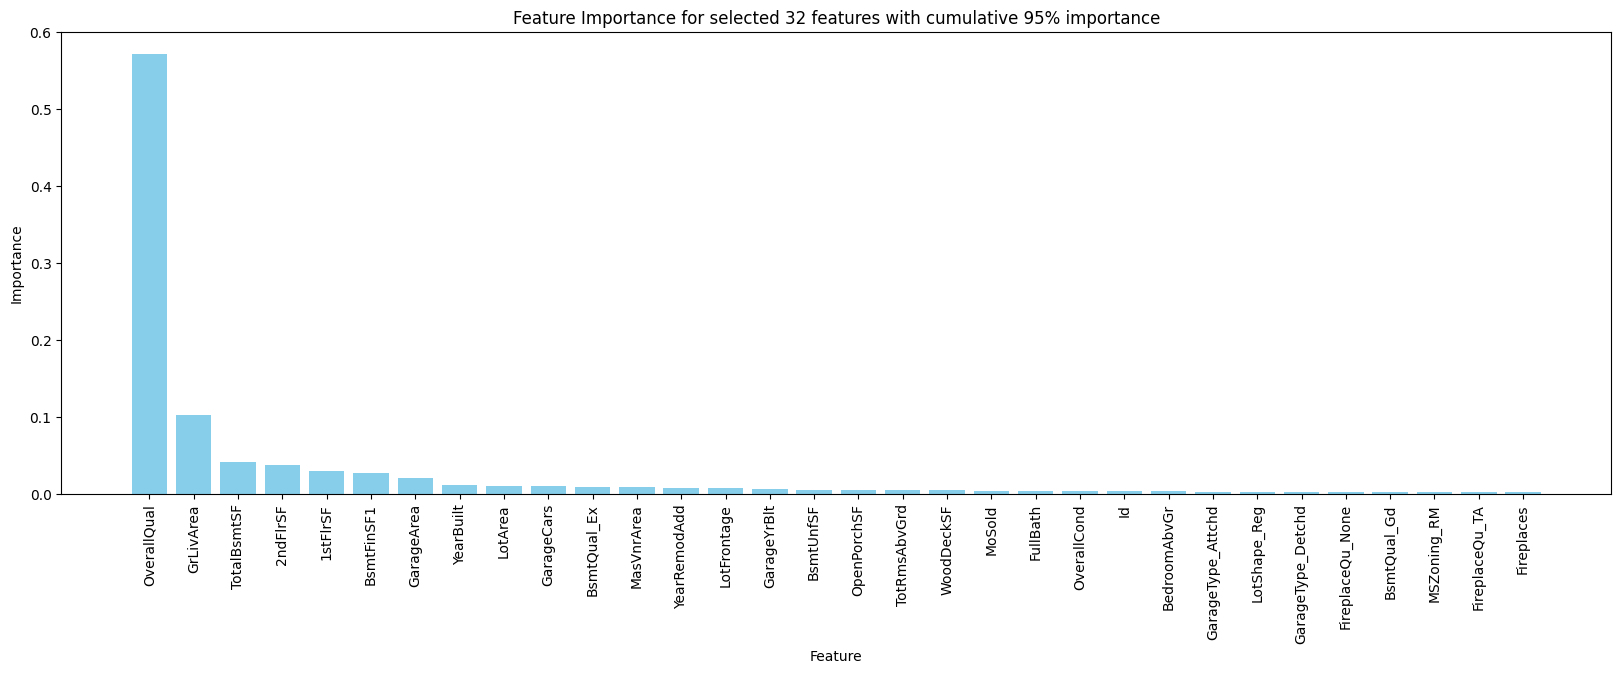

In [55]:
# Creating the bar plot to show the selected features and their importance
plt.figure(figsize=(20, 6))
plt.bar(selected_features_95['Feature'], selected_features_95['Importance'], color='skyblue')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title(f"Feature Importance for selected {num_selected_features_95} features with cumulative 95% importance")
plt.xticks(rotation=90)
plt.show()

Next we defines a set of features that collectively account for 95% of the importance in the model's predictions. It then proceeds to train and evaluate a model using this specific subset of features. The process involves assessing the model's performance based on the selected features, and updates a DataFrame with the model's RMSE , R2 and OOB scores, labeling this evaluation as "95% Importance". This approach facilitates a focused analysis on how effectively the model performs when limited to the most influential features.

In [56]:
# Reduce training and testing sets to selected features
# Define feature sets
features_95 = selected_features_95['Feature'].tolist()
X_train_reduced = X_train[features_95]
X_test_reduced = X_test[features_95]

# Initialize and train the RandomForestRegressor model
feature_95_model = RandomForestRegressor(oob_score=True, criterion='squared_error', random_state=14)
feature_95_model.fit(X_train_reduced, y_train)

# Evaluate the model
oob_score = feature_95_model.oob_score_
y_pred_95 = feature_95_model.predict(X_test_reduced)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_95))
r2score = r2_score(y_test, y_pred_95)

# Add results to the DataFrame
new_row = {"Model": "95% Importance", "RMSE": rmse, "R2": r2score, "OOB Score":oob_score}
new_row_df = pd.DataFrame([new_row])  # Convert new_row to a DataFrame

# Use concat to add the new row
df_reduced_RMSE_R2 = pd.concat([df_reduced_RMSE_R2, new_row_df], ignore_index=True)


# Model with 90% of cumulative Feature Importance
Next, we further refine our strategy by selecting the top features that together contribute to 90% of the cumulative importance. This method allows us to further concentrate on the variables that truly matter to the model's predictions, trimming away additional excess without greatly impacting the overall effectiveness. This step aims to simplify the model even more, potentially increasing its interpretability and efficiency by focusing on the core, most influential data.

In [57]:
# Selecting rows where 'cum_importance' is up to 0.90
selected_features_90 = features[features['cum_importance'] <= 0.90]
num_selected_features_90 = len(selected_features_90.Feature)
print(f"Number of selected Features with 90% cumulative importance is {num_selected_features_90}")
selected_features_90.head()

Number of selected Features with 90% cumulative importance is 15


Feature  Importance  cum_importance
4   OverallQual    0.572089        0.572089
16    GrLivArea    0.102667        0.674756
12  TotalBsmtSF    0.040903        0.715659
14     2ndFlrSF    0.036595        0.752255
13     1stFlrSF    0.029939        0.782193

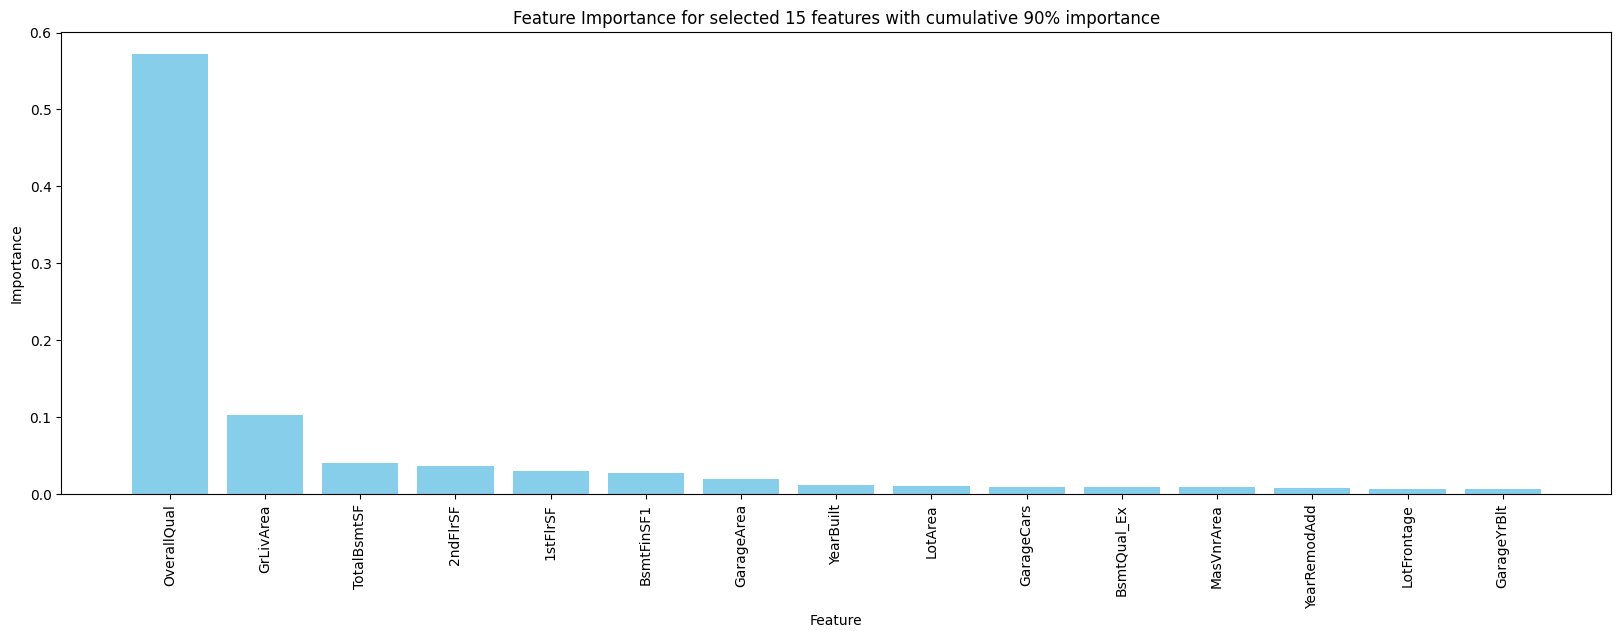

In [58]:
# Creating the bar plot to show the selected features and their importance
plt.figure(figsize=(20, 6))
plt.bar(selected_features_90['Feature'], selected_features_90['Importance'], color='skyblue')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title(f"Feature Importance for selected {num_selected_features_90} features with cumulative 90% importance")
plt.xticks(rotation=90)
plt.show()

Next, defines a feature set comprising features that sum up to 90% in cumulative importance. It then proceeds to train and evaluate a model specifically using this curated list of features. The model's performance metrics, such as RMSE , R2,OOB score  are assessed and recorded in a DataFrame, under the evaluation titled "90% Importance". This streamlined approach focuses
on understanding the model's efficiency and accuracy when limited to the most significant features up to the 90% importance threshold.

In [59]:
# Reduce training and testing sets to selected features
# Define feature sets
features_90 = selected_features_90['Feature'].tolist()
X_train_reduced = X_train[features_90]
X_test_reduced = X_test[features_90]

# Initialize and train the RandomForestRegressor model
feature_90_model = RandomForestRegressor(oob_score=True, criterion='squared_error', random_state=14)
feature_90_model.fit(X_train_reduced, y_train)

# Evaluate the model
oob_score = feature_90_model.oob_score_
y_pred_90 = feature_90_model.predict(X_test_reduced)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_90))
r2score = r2_score(y_test, y_pred_90)

# Add results to the DataFrame
new_row = {"Model": "90% Importance", "RMSE": rmse, "R2": r2score, "OOB Score":oob_score}
new_row_df = pd.DataFrame([new_row])  # Convert new_row to a DataFrame

# Use concat to add the new row
df_reduced_RMSE_R2 = pd.concat([df_reduced_RMSE_R2, new_row_df], ignore_index=True)

# Model with top 10 features

Finally, we focus on simplifying the model by selecting the top 10 features based on their importance. This decision prioritizes the most influential variables, aiming to enhance the model's performance and interpretability. By concentrating on these key features, we streamline the analysis, potentially improving prediction accuracy with a more targeted data set.

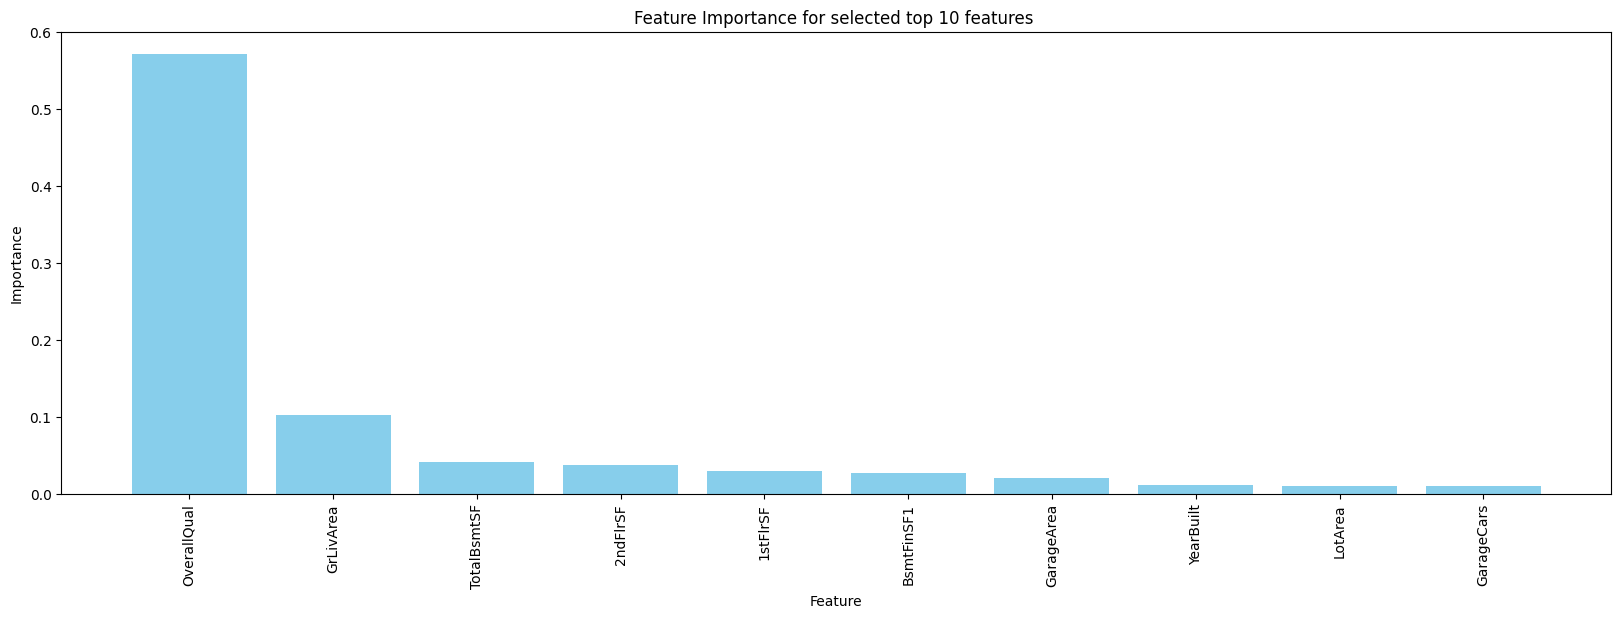

In [60]:
#Lastly we check the top 10 features
selected_features_top_10 = features.head(10)

# Creating the bar plot to show the selected features and their importance
plt.figure(figsize=(20, 6))
plt.bar(selected_features_top_10['Feature'], selected_features_top_10['Importance'], color='skyblue')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title(f"Feature Importance for selected top 10 features ")
plt.xticks(rotation=90)
plt.show()


Next we define a subset of the top 10 most significant features and then uses this subset to train and evaluate a model's performance. It gauge how well the model performs with these key features, incorporating the results into a DataFrame labeled "Top 10 Features." This method underscores the effectiveness of prioritizing the most impactful features in enhancing the model's precision and overall performance.

In [61]:
# Reduce training and testing sets to selected features
# Define feature sets
features_10 = selected_features_top_10['Feature'].tolist()
X_train_reduced = X_train[features_10]
X_test_reduced = X_test[features_10]

# Initialize and train the RandomForestRegressor model
feature_10_model = RandomForestRegressor(oob_score=True, criterion='squared_error', random_state=14)
feature_10_model.fit(X_train_reduced, y_train)

# Evaluate the model
oob_score = feature_10_model.oob_score_
y_pred_top_10 = feature_10_model.predict(X_test_reduced)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_top_10))
r2score = r2_score(y_test, y_pred_top_10)

# Add results to the DataFrame
new_row = {"Model": "Top 10 Features", "RMSE": rmse, "R2": r2score, "OOB Score":oob_score}
new_row_df = pd.DataFrame([new_row])  # Convert new_row to a DataFrame

# Use concat to add the new row
df_reduced_RMSE_R2 = pd.concat([df_reduced_RMSE_R2, new_row_df], ignore_index=True)

new_row = {"Model": "Random Forest", "RMSE": rmse, "R2": r2score}
new_row_df = pd.DataFrame([new_row])  # Convert new_row to a DataFrame

# Use concat to add the new row
df_compare = pd.concat([df_compare, new_row_df], ignore_index=True)

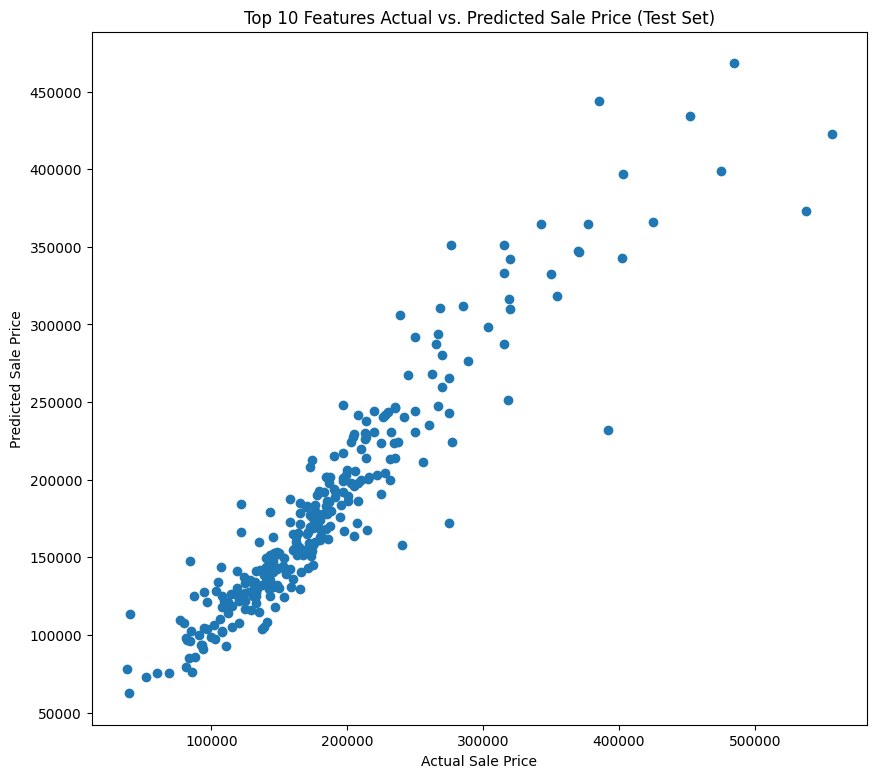

In [62]:
plt.figure(figsize=(10,9))
plt.scatter(y_test, y_pred_top_10)
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Top 10 Features Actual vs. Predicted Sale Price (Test Set)")
plt.show()

# Compare all the RandomForestRegressor models

In the final step, we systematically compare all RandomForest Regressor models to determine the most effective based on key metrics: RMSE (Root Mean Squared Error), R2 (coefficient of determination), and OOB (Out-of-Bag) score. This comparison encompasses the Baseline model, the model optimized via RandomizedSearchCV, and models configured with reduced feature sets based on varying levels of cumulative importance—specifically, those with 95% cumulative importance, 90% cumulative importance, and the selection of the top 10 features. This comprehensive evaluation allows us to discern the relative performance of each model configuration, highlighting how feature selection and hyperparameter tuning impact the model's accuracy, fit to the data, and generalization capability.

In [63]:
df_reduced_RMSE_R2

Model          RMSE        R2  OOB Score
0            Baseline  27948.050388  0.878506   0.840812
1  RandomizedSearchCV  27557.272795  0.881880   0.843062
2      95% Importance  27910.034544  0.878837   0.839128
3      90% Importance  28131.510679  0.876906   0.838759
4     Top 10 Features  27398.149048  0.883240   0.845175

# Findings based on Random forest


The table compares various models on their performance in predicting sale prices, evaluated by RMSE (lower is better), R2 (closer to 1 is better), and OOB Score (higher indicates better generalization).  In summary, comparing various models reveals the "Top 10 Features" model as the standout, offering the most balanced performance  indicating superior accuracy, fit, and generalization. While the RandomizedSearchCV Model shows slight improvements over the baseline in accuracy and fit, it is the focused approach of the "Top 10 Features" model that truly optimizes performance across all metrics. Conversely, models prioritizing 95% and 90% importance show a trade-off, with slight decreases in accuracy and fit but varied generalization capabilities, highlighting the effectiveness of strategic feature selection in enhancing model outcomes.

# Compare Linear Regression, Decison Tree and Random Forest Regressor

In [64]:
df_compare

Model          RMSE        R2
0  Linear Regression  31539.069251  0.842849
1      Decision Tree  36632.419444  0.791272
2      Random Forest  27398.149048  0.883240

The table above presents the performance metrics for three different predictive models—Linear Regression, Decision Tree, and Random Forest evaluated on their ability to predict a certain outcome, using two key metrics: RMSE (Root Mean Squared Error) and R2 (R-squared).

Linear Regression Model: This model has an RMSE of 31,539.07 and an R2 of 0.8428, indicating that it predicts with a moderate level of error and explains approximately 84.28% of the variance in the dependent variable. This suggests a good fit, though there is room for improvement.

Decision Tree Model: Shows an RMSE of 36,632.42, which is higher than that of the Linear Regression model, indicating less accuracy in its predictions. Its R2 score of 0.7913 means it explains about 79.13% of the variance, which is lower compared to Linear Regression, suggesting a weaker fit to the data.

Random Forest Model: Exhibits the lowest RMSE  among the three models, implying the highest prediction accuracy. With an R2 of 0.88, it also has the highest explanatory power, accounting for approximately 88% of the variance in the dependent variable. This indicates a strong fit and superior performance in both accuracy and explaining the outcome variable compared to the other two models.

In summary, the Random Forest model outperforms both the Linear Regression and Decision Tree models in terms of predictive accuracy and the ability to explain the variance in the dependent variable, as evidenced by its lower RMSE and higher R2 scores. This underscores the effectiveness of ensemble methods like Random Forest in handling complex datasets and prediction tasks.

# Conclusion

Over the course of this analysis, we set out to describe and analyze a database detailing real estate sales prices and associated factors in the community of Ames, Iowa. We first cleaned the data by identifying missing values. When appropriate, we estimated missing values through ratio estimates. We further used the dataset to compare the mean sales price parameter through both a stratified sampling procedure and a simple random sample. In line with expectations, the stratified sample resulted in an estimate with lower variance.
We then proceeded to model the real estate sales price through several different regression techniques. For the linear model, we withheld 20% of the data to act as a testing wet. We first created a linear regression model. To optimize the predictive power of the model relative to its complexity, we created a recursive feature selection algorithm. Predictive features were sequentially selected based on the results of a univariate f-test. A cross-validated RMSE value was calculated for each sequential set of variables, which was then used to determine the optimal set of predictive features. We found that the optimal feature set consisted of the variables with the 48 lowest univariate p-values.
We then looked for higher order relationships by iteratively fitting a model with each numeric variable represented as a quadratic term. Ultimately, we determined that the small decrease in RMSE associated with several of the quadratic terms did not justify the added model complexity, and we moved forward without any higher order terms. We quickly found that the model did not meet the assumptions necessary for a valid linear model (homoscedasticity). Nevertheless, we evaluated the predictive abilities of the model and found a RMSE and R2 value of 31,539.07 and 0.84, respectively.
Following the linear model, we created a decision tree regression model. Similarly to the linear regression model, we withheld a subset of the data to act as a testing set.

We then standardized the data and fit a decision tree regression model.
The decision tree regression model was fit with all the features (model 1), and the RMSE was found to be 0.47 and Rsquared score was found to be 0.77. The decision tree regressor was then further refined by re-creating two additional models; the two models were defined by the variables that had a Pearson correlation value with the Sale Price greater than 0.5 and 0.7 named model 2 and model 3 respectively. The model 2 consisted of 11 variables and resulted in a RMSE of 0.47 and Rsquared score of 0.77. The model 3 was only composed of two variables. The RMSE for this model only increased to 0.54, while the R2 value dropped slightly to 0.71. Therefore model 2 was selected optimal for further analysis. After performing cross validation and hyper parameter tuning on this model the final model was derived with RMSE value $36,632 (original scale) and Rsquared score of 0.79.

We then looked to improve upon the decision tree regressor by combining the outputs of multiple decision trees into a random forest regression. We first created a baseline random forest model using all of the training data, this resulted in a RMSE score of $28,577 and an R2  of 0.87. Immediately, these results are already the best that have been observed thus far. We further fine-tuned the random forest model through adding a criterion to minimize the squared error of the estimates. We additionally used a randomized search cross validation procedure to further estimate the optimal parameters. Following these steps, we visualized the relative importance of features, as defined by the feature importance values provided within the sklearn module. We looked at the top 10 most influential features, as well as the top features that accounted for both 95 and 90% of the cumulative importance.

# Discussion
Through this analysis, we found that the random forest regression model proved to be the most precise model, as evidence by its low RMSE score. Additionally, the model appears to maintain considerable accuracy and accounts for a substantial portion of the total variance in real estate sales prices (R^2). It is not surprising that the random forest regression would be an improvement to the decision tree, as the same logic is employed, but the random forest incorporates a more robust parameter selection procedure. Although our linear model was not found to be valid, the substantially higher RMSE score of the linear model signifies that it is likely safe to say that the random forest regressor provides better overall predictive capabilities. However, due to its lack of validity, these findings should likely not be generalized beyond our project. Additionally, future studies could perform a more comprehensive analysis of the predictor variables to eliminate those that are redundant and identify those that are most likely to have a linear relationship with sales price. The advantage of a creating a linear model would be the clear quantification of each predictor variables relationship with sales price, as captured in the beta parameters. Although, there is still some quantification of this relationships in the classification criteria of each node in the decision tree/random forest, the binary nature of the classification provides less insight than would the linear model coefficients. Lastly, we found that the computation time associated with some of the steps in this project were approaching being prohibitively long. Future studies that wanted to make use of similar or larger datasets could consider dimensionality reduction procedures prior to model fitting, such as principal component analysis.
